In [ ]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets  #For the iris dataset
from sklearn.model_selection import train_test_split  #for splitting into train/test
from sklearn.neighbors import KNeighborsClassifier #for the KNN classifier
from sklearn.metrics import precision_score, recall_score #for precision and recall calculations
from sklearn.model_selection import cross_val_score # for k fold CV
from sklearn.model_selection import GridSearchCV #for the grid search
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from IPython.display import Image
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsRegressor #for the KNN classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC


In [ ]:
# Suppress convergence warnings, helps get rid of the warnings when running
#Grid Search
warnings.filterwarnings("ignore")

---
#### CS 362 - Machine Learning - Final Project - SP24
---

# Predicting NBA Salaries

### By: Jonathan Eudja & Brendan Hasara


---

## 1. Introduction

For this project, our group wanted to take NBA statistics and see how different ML algorithms correctly predict average salary for a player's contract. Since salary is a continous variable, we first use Regression techniques then convert the avg_salary column into categories and use Classifiers. While finding RMSE and accuracies, we can also use the ML algorithms to predict salaries and find hidden gems in the NBA. Along the way, we found that we can use the same models to classify different questions such as "Is a player an efficient shooter?" or "How close can our models correctly predict total points?". The average fan asks these types of questions, but our group wanted to take a look at the data side of the sport rather than assuming. NBA general managers across the league have considered using statistics to their advantage to prepare their team for an NBA season, so we wanted to explore what these trends, projections, and results would look like when using ML algorithms.

Research Question: With the given stats, how well can our models accurately predict NBA salary?

---

## 2. Data

A direct link to the data can be found at the following website.
NBA contracts from 2010/2011 - 2019/2020 & NBA Salaries from 2020 - 2025:
 * https://hoopshype.com/salaries/players/
 * https://www.nba.com/stats/players/
 * https://www.spotrac.com/nba/contracts/

All websites included in the dataset are statistics and contract signings based off of reliable NBA data sources from various websites all put into one dataset. One of the websites is the official NBA websites showing advanced statistics for an individual player. The other websites are information about contract salaries which is provided from multiple NBA sources around the league. The other csv which includes contracts from 2020 - 2025 also use hoopshype, a reliable source that uses the NBA official site to get their statistics and NBA insiders who get information about salary and rumors around the league.

In [ ]:
#In this cell, we load the data.
nba_contracts = pd.read_csv("https://raw.githubusercontent.com/BHasara/CS-362-Final-Project/main/nba_contracts_history.csv")
nba_contracts

,name,contract_start,contract_end,avg_salary,age,gp,w,l,min,pts,...,ft_percentage,oreb,dreb,reb,ast,tov,stl,blk,pf,plus_minus
0,Wesley Matthews,2019,2020,2.564753e+06,32,69,27,42,2091,840,...,81.0,32,138,170,160,91,54,17,160,-90
1,Brook Lopez,2015,2017,2.116568e+07,27,72,34,38,2100,1236,...,81.4,214,321,535,50,104,43,126,206,-104
2,DeAndre Jordan,2011,2014,1.075976e+07,22,80,31,49,2047,566,...,45.2,207,368,575,42,101,41,142,255,-100
3,Markieff Morris,2015,2018,8.143324e+06,25,82,39,43,2581,1258,...,76.3,110,396,506,192,170,101,39,245,105
4,Dwight Howard,2018,2019,1.341074e+07,32,81,35,46,2463,1347,...,57.4,255,757,1012,105,208,48,131,249,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,Brook Lopez,2012,2014,1.469367e+07,24,5,2,3,136,96,...,62.5,8,10,18,6,6,1,4,8,-27
195,Nikola Vucevic,2015,2018,1.200000e+07,24,74,21,53,2529,1428,...,75.2,238,572,810,147,148,54,54,220,-302
196,Aron Baynes,2015,2017,5.766667e+06,28,70,49,21,1122,461,...,86.5,109,209,318,35,65,16,22,162,136
197,Andre Iguodala,2013,2016,1.200000e+07,29,80,57,23,2779,1038,...,57.4,82,341,423,433,206,139,52,127,380


In [ ]:
#In this cell, we load the data.
future_salaries = pd.read_csv("https://raw.githubusercontent.com/BHasara/CS-362-Final-Project/main/Nba%20Player%20Salaries.csv?token=GHSAT0AAAAAACPZPDAFJCIOTZSK3455WHY4ZPZQYCQ")
future_salaries

,player_id,player_name,2022_2023,2023_2024,2024_2025,2024_2025.1
0,1,Stephen Curry,"$48,070,014","$51,915,615","$55,761,217","$59,606,817"
1,2,John Wall,"$47,345,760",$0,$0,$0
2,3,Russell Westbrook,"$47,080,179",$0,$0,$0
3,4,LeBron James,"$44,474,988","$46,698,737","$50,434,636",$0
4,5,Kevin Durant,"$44,119,845","$47,649,433","$51,179,020","$54,708,608"
...,...,...,...,...,...,...
569,570,Gabe York,"$32,171",$0,$0,$0
570,571,Ibou Badji,"$18,226","$1,761,752",$0,$0
571,572,Tristan Thompson,"$16,700",$0,$0,$0
572,573,RaiQuan Gray,"$5,849","$547,349",$0,$0


### 2.1 Summary of Variables within the nba_contracts Table

The nba_contracts table has 28 columns/variables and 199 rows.  All variables are explained in this section, including their descriptions, their units, their types, and some descriptive statistics.

#### A. CATEGORICAL VARIABLES

* **name** – name of the player
    * Number of missing values: 0
    * Contains 138 distinct values:
        * All the players that signed contracts from 2010 - 2020
    * Any other important facts, should you discover them during your analysis.

* **contract_start** – the year the player's contract starts
    * Number of missing values: 0
    * Units: years
    * Contains 9 distinct values:
        * 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019
    * The contract start is meant to start at the beginning of the season, not when the player signs the contract.

* **contract_end** – the year the player's contract ends
    * Number of missing values: 0
    * Units: years
    * Contains 8 distinct values:
        * 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020

#### B. QUANTITATIVE  DISCRETE VARIABLES

**All players statistics are taken to the season prior to their contract signing**

* **age** – age of player
    * Number of missing values: 0
    * Units: years
    * max value: 36
    * min value: 20
    * average value: 25.9
    * Contains mainly "older" players, this dataset does not include rookie signings, so players that are 18-22 years old that recently joined the league, will not be in this dataset.

* **gp** – games played (either started or came off the bench)
    * Number of missing values: 0
    * Units: each game played
    * max value: 82
    * min value: 1
    * average value: 64.17
    * The average is 64.17 because when a player is playing for a contract, they need to have evidence that they deserve it. The reason it's not higher is due to injuries or rest games for players, since 82 games is a lot for a player's endurance.

* **w** – wins from games the player played in
    * Number of missing values: 0
    * Units: # of wins
    * max value: 64
    * min value: 0
    * average value: 34.21
    * This column is individual to a player, not the team. The reason why a minimum of 0 won games, is due to lack of performance or injuries. An example, Edmond Sumner signed a contract in 2017, played a single game, and their team lost, showing up as a 0 for his data.

* **l** – losses from games a player played in
    * Number of missing values: 0
    * Units: # of losses
    * max value: 62
    * min value: 0
    * average value: 29.95
    * Same as the win column, specific to a player and not their team.

* **min** – total minutes a player played
    * Number of missing values: 0
    * Units: minutes
    * max value: 3125
    * min value: 2
    * average value: 1746.98

* **pts** – total points scored
    * Number of missing values: 0
    * Units: points
    * max value: 2376
    * min value: 0
    * average value: 813.44
    * Any other important facts, should you discover them during your analysis.

* **fgm** – field goals made
    * Number of missing values: 0
    * Units: total field goals made
    * max value: 743
    * min value: 0
    * average value: 300.39
    * This is the total amount of times a player puts the ball through the basket but this does not include free throws.

* **fga** – field goals attempted
    * Number of missing values: 0
    * Units: total field goals attempted
    * max value: 1643
    * min value: 1
    * average value: 638.76
    * This is the total shot attempts for a player, whether they make it or miss it.

* **3pm** –total 3 pointers made
    * Number of missing values: 0
    * Units: total 3's
    * max value: 272
    * min value: 0
    * average value: 63.61
    * A three pointer is a shot in basketball which is 23.75 ft from the top of the half circle, and 22 ft from the side of the half circle. This stat determines how many 3 points were made.

* **3pa** – total 3 pointers attempted
    * Number of missing values: 0
    * Units: total 3's shot
    * max value: 657
    * min value: 0
    * average value: 173.95

* **ftm** – free throws made
    * Number of missing values: 0
    * Units: total free throws made
    * max value: 720
    * min value: 0
    * average value: 149.04

* **fta** – free throws attempted
    * Number of missing values: 0
    * Units: total free throws attempted
    * max value: 837
    * min value: 0
    * average value: 195.52

* **oreb** – total offensive rebounds
    * Number of missing values: 0
    * max value: 397
    * min value: 0
    * average value: 79.35

* **dreb** – total defensive rebounds
    * Number of missing values: 0
    * max value: 829
    * min value: 1
    * average value: 248.98

* **reb** – total rebounds
    * Number of missing values: 0
    * max value: 1226
    * min value: 1
    * average value: 328.33
    * Takes a total of oreb + dreb.

* **ast** – total assists
    * Number of missing values: 0
    * max value: 839
    * min value: 0
    * average value: 171.67

* **tov** – total turnovers
    * Number of missing values: 0
    * max value: 374
    * min value: 0
    * average value: 103.38

* **stl** – total steals
    * Number of missing values: 0
    * max value: 169
    * min value: 0
    * average value: 58.19
  
* **blk** – total blocks
    * Number of missing values: 0
    * max value: 269
    * min value: 0
    * average value: 39.63

* **pf** – total personal fouls
    * Number of missing values: 0
    * max value: 291
    * min value: 1
    * average value: 137.67

* **plus_minus** – total plus/minus
    * Number of missing values: 0
    * max value: 839
    * min value: -628
    * average value: 62.87
    * Plus/Minus is the difference in points when on the court. So if a player has a positive plus/minus, the team tends to score more while this player is on the court.

#### C. QUANTITATIVE  CONTINUOUS VARIABLES

* **avg_salary** – average salary amount during a player's contract
    * Number of missing values: 0
    * Units: dollars
    * max value: 33599500
    * min value: 823244
    * average value: 11073609.11
    * The average salary is the average taken during their contract time. So if a player signs a contract for 4 years; 1st year: 20 mil, 2nd year: 22 mil, 3rd year: 24 mil, and 4th year: 26 mil, the average would be 23 mil.

* **fg_percentage** – fgm / fga
    * Number of missing values: 0
    * Units: percentage
    * max value: 100.0
    * min value: 0.0
    * average value: 46.74
    * The field goal percentage determines whether a player makes most of their shots or not. This is a very important stat in sports, due to efficiency. If a player has a higher efficiency, this could mean they take better shots, get easier scoring opportunities, and overall smarter decisions.

* **3p_percentage** – 3pm / 3pa
    * Number of missing values: 0
    * Units: percentage
    * max value: 100.0
    * min value: 0.0
    * average value: 46.74
    * The 3 point percentage determines whether a player makes most of their shots or not. This is a portion of the fg_percentage but specifically for the 3 point shot.

* **ft_percentage** – ftm / fta
    * Number of missing values: 0
    * Units: percentage
    * max value: 100.0
    * min value: 0.0
    * average value: 74.03
    * The free throw percentage determines how well a player shoots after being fouled. Usually this stat is helpful for teams to send their best free throw shooter to the line in certain situations.

### 2.2 Code used to Summarize Variables in the nba_contracts Table

In this section we include the code used to describe the variables in the previous section.

#### name

In [ ]:
#Get the distinct values in the name column
nba_contracts["name"].nunique()

138

In [ ]:
#Get the min, max, and average in the name column
nba_contracts[["name"]].agg(["min", "max"])

,name
min,Al Horford
max,Zaza Pachulia


In [ ]:
#Get the number of missing values in name column
nba_contracts["name"].isna().sum()

0

#### contract_start

In [ ]:
#Get the distinct values in the contract_start column
nba_contracts["contract_start"].unique()

array([2019, 2015, 2011, 2018, 2016, 2014, 2013, 2017, 2012])

In [ ]:
#Get the min, max, and average in the contract_start column
nba_contracts[["contract_start"]].agg(["min", "max", "average"])

,contract_start
min,2011.000000
max,2019.000000
average,2015.241206


In [ ]:
#Get the number of missing values in contract_start column
nba_contracts["contract_start"].isna().sum()

0

#### contract_end

In [ ]:
#Get the distinct values in the contract_end column
nba_contracts["contract_end"].unique()

array([2020, 2017, 2014, 2018, 2019, 2016, 2015, 2013])

In [ ]:
#Get the min, max, and average in the contract_end column
nba_contracts[["contract_end"]].agg(["min", "max", "average"])

,contract_end
min,2013.000000
max,2020.000000
average,2017.507538


In [ ]:
#Get the number of missing values in contract_end column
nba_contracts["contract_end"].isna().sum()

0

#### avg_salary

In [ ]:
#Get the distinct values in the avg_salary column
nba_contracts["avg_salary"].nunique()

172

In [ ]:
#Get the min, max in the avg_salary column
nba_contracts[["avg_salary"]].agg(["min", "max", "average"])

,avg_salary
min,8.232440e+05
max,3.359950e+07
average,1.107361e+07


In [ ]:
#Get the mean in the avg_salary column
nba_contracts["avg_salary"].mean()

11073609.11557789

In [ ]:
#Get the number of missing values in avg_salary column
nba_contracts["avg_salary"].isna().sum()

0

#### age

In [ ]:
#Get the distinct values in the age column
nba_contracts["age"].unique()

array([32, 27, 22, 25, 28, 29, 21, 36, 31, 23, 33, 26, 30, 24, 34, 20])

In [ ]:
#Get the min, max, and average in the age column
nba_contracts[["age"]].agg(["min", "max", "average"])

,age
min,20.000000
max,36.000000
average,25.934673


In [ ]:
#Get the number of missing values in age column
nba_contracts["age"].isna().sum()

0

#### gp

In [ ]:
#Get the distinct values in the gp column
nba_contracts["gp"].nunique()

59

In [ ]:
#Get the min, max, and average in the gp column
nba_contracts[["gp"]].agg(["min", "max", "average"])

,gp
min,1.000000
max,82.000000
average,64.170854


In [ ]:
#Get the number of missing values in gp column
nba_contracts["gp"].isna().sum()

0

#### w

In [ ]:
#Get the distinct values in the w column
nba_contracts["w"].nunique()

56

In [ ]:
#Get the min, max, and average in the w column
nba_contracts[["w"]].agg(["min", "max", "average"])

,w
min,0.00000
max,64.00000
average,34.21608


In [ ]:
#Get the number of missing values in w column
nba_contracts["w"].isna().sum()

0

#### l

In [ ]:
#Get the distinct values in the l column
nba_contracts["l"].nunique()

53

In [ ]:
#Get the min, max, and average in the l column
nba_contracts[["l"]].agg(["min", "max", "average"])

,l
min,0.000000
max,62.000000
average,29.954774


In [ ]:
#Get the number of missing values in l column
nba_contracts["l"].isna().sum()

0

#### min

In [ ]:
#Get the distinct values in the min column
nba_contracts["min"].nunique()

193

In [ ]:
#Get the min, max, and average in the min column
nba_contracts[["min"]].agg(["min", "max", "average"])

,min
min,2.000000
max,3125.000000
average,1746.984925


In [ ]:
#Get the number of missing values in min column
nba_contracts["min"].isna().sum()

0

#### pts

In [ ]:
#Get the distinct values in the pts column
nba_contracts["pts"].nunique()

186

In [ ]:
#Get the min, max, and average in the pts column
nba_contracts[["pts"]].agg(["min", "max", "average"])

,pts
min,0.000000
max,2376.000000
average,813.447236


In [ ]:
#Get the number of missing values in pts column
nba_contracts["pts"].isna().sum()

0

#### fgm

In [ ]:
#Get the distinct values in the fgm column
nba_contracts["fgm"].nunique()

172

In [ ]:
#Get the min, max, and average in the fgm column
nba_contracts[["fgm"]].agg(["min", "max", "average"])

,fgm
min,0.000000
max,743.000000
average,300.396985


In [ ]:
#Get the number of missing values in fgm column
nba_contracts["fgm"].isna().sum()

0

#### fga

In [ ]:
#Get the distinct values in the fga column
nba_contracts["fga"].nunique()

189

In [ ]:
#Get the min, max, and average in the fga column
nba_contracts[["fga"]].agg(["min", "max", "average"])

,fga
min,1.000000
max,1643.000000
average,638.763819


In [ ]:
#Get the number of missing values in fga column
nba_contracts["fga"].isna().sum()

0

#### fg_percentage

In [ ]:
#Get the distinct values in the fg_percentage column
nba_contracts["fg_percentage"].nunique()

131

In [ ]:
#Get the min, max, and average in the fg_percentage column
nba_contracts[["fg_percentage"]].agg(["min", "max", "average"])

,fg_percentage
min,0.000000
max,100.000000
average,46.743719


In [ ]:
#Get the number of missing values in fg_percentage column
nba_contracts["fg_percentage"].isna().sum()

0

#### 3pm

In [ ]:
#Get the distinct values in the 3pm column
nba_contracts["3pm"].nunique()

111

In [ ]:
#Get the min, max, and average in the 3pm column
nba_contracts[["3pm"]].agg(["min", "max", "average"])

,3pm
min,0.00000
max,272.00000
average,63.60804


In [ ]:
#Get the number of missing values in 3pm column
nba_contracts["3pm"].isna().sum()

0

#### 3pa

In [ ]:
#Get the distinct values in the 3pa column
nba_contracts["3pa"].nunique()

139

In [ ]:
#Get the min, max, and average in the 3pa column
nba_contracts[["3pa"]].agg(["min", "max", "average"])

,3pa
min,0.000000
max,657.000000
average,173.949749


In [ ]:
#Get the number of missing values in 3pa column
nba_contracts["3pa"].isna().sum()

0

#### 3p_percentage

In [ ]:
#Get the distinct values in the 3p_percentage column
nba_contracts["3p_percentage"].nunique()

110

In [ ]:
#Get the min, max, and average in the 3p_percentage column
nba_contracts[["3p_percentage"]].agg(["min", "max", "average"])

,3p_percentage
min,0.000000
max,50.000000
average,29.723618


In [ ]:
#Get the number of missing values in 3p_percentage column
nba_contracts["3p_percentage"].isna().sum()

0

#### ftm

In [ ]:
#Get the distinct values in the ftm column
nba_contracts["ftm"].nunique()

143

In [ ]:
#Get the min, max, and average in the ftm column
nba_contracts[["ftm"]].agg(["min", "max", "average"])

,ftm
min,0.000000
max,720.000000
average,149.045226


In [ ]:
#Get the number of missing values in ftm column
nba_contracts["ftm"].isna().sum()

0

#### fta

In [ ]:
#Get the distinct values in the fta column
nba_contracts["fta"].nunique()

162

In [ ]:
#Get the min, max, and average in the fta column
nba_contracts[["fta"]].agg(["min", "max", "average"])

,fta
min,0.000000
max,837.000000
average,195.522613


In [ ]:
#Get the number of missing values in fta column
nba_contracts["fta"].isna().sum()

0

#### ft_percentage

In [ ]:
#Get the distinct values in the ft_percentage column
nba_contracts["ft_percentage"].nunique()

147

In [ ]:
#Get the min, max, and average in the ft_percentage column
nba_contracts[["ft_percentage"]].agg(["min", "max", "average"])

,ft_percentage
min,0.000000
max,100.000000
average,74.027136


In [ ]:
#Get the number of missing values in ft_percentage column
nba_contracts["ft_percentage"].isna().sum()

0

#### oreb

In [ ]:
#Get the distinct values in the oreb column
nba_contracts["oreb"].nunique()

117

In [ ]:
#Get the min, max, and average in the oreb column
nba_contracts[["oreb"]].agg(["min", "max", "average"])

,oreb
min,0.000000
max,397.000000
average,79.346734


In [ ]:
#Get the number of missing values in oreb column
nba_contracts["oreb"].isna().sum()

0

#### dreb

In [ ]:
#Get the distinct values in the dreb column
nba_contracts["dreb"].nunique()

167

In [ ]:
#Get the min, max, and average in the dreb column
nba_contracts[["dreb"]].agg(["min", "max", "average"])

,dreb
min,1.000000
max,829.000000
average,248.984925


In [ ]:
#Get the number of missing values in dreb column
nba_contracts["dreb"].isna().sum()

0

#### reb

In [ ]:
#Get the distinct values in the reb column
nba_contracts["reb"].nunique()

169

In [ ]:
#Get the min, max, and average in the reb column
nba_contracts[["reb"]].agg(["min", "max", "average"])

,reb
min,1.000000
max,1226.000000
average,328.331658


In [ ]:
#Get the number of missing values in reb column
nba_contracts["reb"].isna().sum()

0

#### ast

In [ ]:
#Get the distinct values in the ast column
nba_contracts["ast"].nunique()

147

In [ ]:
#Get the min, max, and average in the ast column
nba_contracts[["ast"]].agg(["min", "max", "average"])

,ast
min,0.000000
max,839.000000
average,171.673367


In [ ]:
#Get the number of missing values in ast column
nba_contracts["ast"].isna().sum()

0

#### tov

In [ ]:
#Get the distinct values in the tov column
nba_contracts["tov"].nunique()

138

In [ ]:
#Get the min, max, and average in the tov column
nba_contracts[["tov"]].agg(["min", "max", "average"])

,tov
min,0.000000
max,374.000000
average,103.386935


In [ ]:
#Get the number of missing values in tov column
nba_contracts["tov"].isna().sum()

0

#### stl

In [ ]:
#Get the distinct values in the stl column
nba_contracts["stl"].nunique()

100

In [ ]:
#Get the min, max, and average in the stl column
nba_contracts[["stl"]].agg(["min", "max", "average"])

,stl
min,0.000000
max,169.000000
average,58.190955


In [ ]:
#Get the number of missing values in stl column
nba_contracts["stl"].isna().sum()

0

#### blk

In [ ]:
#Get the distinct values in the blk column
nba_contracts["blk"].nunique()

83

In [ ]:
#Get the min, max, and average in the blk column
nba_contracts[["blk"]].agg(["min", "max", "average"])

,blk
min,0.000000
max,269.000000
average,39.633166


In [ ]:
#Get the number of missing values in blk column
nba_contracts["blk"].isna().sum()

0

#### pf

In [ ]:
#Get the distinct values in the pf column
nba_contracts["pf"].nunique()

135

In [ ]:
#Get the min, max, and average in the pf column
nba_contracts[["pf"]].agg(["min", "max", "average"])

,pf
min,1.000000
max,291.000000
average,137.668342


In [ ]:
#Get the number of missing values in pf column
nba_contracts["pf"].isna().sum()

0

#### plus_minus

In [ ]:
#Get the distinct values in the plus_minus column
nba_contracts["plus_minus"].nunique()

171

In [ ]:
#Get the min, max, and average in the plus_minus column
nba_contracts[["plus_minus"]].agg(["min", "max", "average"])

,plus_minus
min,-628.000000
max,839.000000
average,62.874372


In [ ]:
#Get the number of missing values in plus_minus column
nba_contracts["plus_minus"].isna().sum()

0

### 2.3 Summary of Variables within the future_salaries Table

The futures_salaries tables contains player's salaries 2-6 years after our last year in the nba_contracts dataframe. If we decide to predict salary in the nba_contracts, we can use this table to tell us if our predictions are accurate to real life salaries.

In [ ]:
#In this cell, we load the data.
future_salaries = pd.read_csv("https://raw.githubusercontent.com/BHasara/CS-362-Final-Project/main/Nba%20Player%20Salaries.csv?token=GHSAT0AAAAAACPZPDAFJCIOTZSK3455WHY4ZPZQYCQ")
future_salaries

,player_id,player_name,2022_2023,2023_2024,2024_2025,2024_2025.1
0,1,Stephen Curry,"$48,070,014","$51,915,615","$55,761,217","$59,606,817"
1,2,John Wall,"$47,345,760",$0,$0,$0
2,3,Russell Westbrook,"$47,080,179",$0,$0,$0
3,4,LeBron James,"$44,474,988","$46,698,737","$50,434,636",$0
4,5,Kevin Durant,"$44,119,845","$47,649,433","$51,179,020","$54,708,608"
...,...,...,...,...,...,...
569,570,Gabe York,"$32,171",$0,$0,$0
570,571,Ibou Badji,"$18,226","$1,761,752",$0,$0
571,572,Tristan Thompson,"$16,700",$0,$0,$0
572,573,RaiQuan Gray,"$5,849","$547,349",$0,$0


#### A. CATEGORICAL VARIABLES

* **player_name** – name of the player
    * Number of missing values: 0
    * Contains 574 distinct values:
        * All the players that have a contract from 2022 - 2026

#### B. QUANTITATIVE  DISCRETE VARIABLES

* **player_id** – unique id for a player

    * Number of missing values: 0
    * max value: 573
    * min value: 1
    * Each player has a unique id. The id is based on salary for the 2022_2023 season descending. If you have a low player_id, you will have a higher salary for that season.

#### C. QUANTITATIVE  CONTINUOUS VARIABLES

* **2022_2023** – player's salary for 2022/2023
    * Number of missing values: 0
    * Units: dollars
    * max value: 48,070,014
    * min value: 5849
    * average value: 7927815.32

* **2023_2024** – player's salary for 2023/2024
    * Number of missing values: 0
    * Units: dollars
    * max value: 51,915,615
    * min value: 0
    * average value: 7380812.18

* **2024_2025** – player's salary for 2024/2025
    * Number of missing values: 0
    * Units: dollars
    * max value: 55,761,217
    * min value: 0
    * average value: 5626753.28

* **2025_2026** – player's salary for 2025/2026
    * Number of missing values: 0
    * Units: dollars
    * max value: 59,606,817
    * min value: 0
    * average value: 4081683.18

### 2.4 Code used to Summarize Variables in the future_salaries Table

The future_salaries has a couple problems in it. Where we are supposed to have an integer value, we have a string and we have a duplicate column we need to change the wording to.

In [ ]:
#Changing string salaries like "$48,070,014" to "48070014"

#Renaming 2024_2025.1 to 2025_2026
future_salaries.rename(columns={"2024_2025.1":"2025_2026"}, inplace = True)

#Dropping the "$" and ","

future_salaries["2022_2023"] = future_salaries["2022_2023"].str.replace("$", "")
future_salaries["2022_2023"] = future_salaries["2022_2023"].str.replace(",", "")

future_salaries["2023_2024"] = future_salaries["2023_2024"].str.replace("$", "")
future_salaries["2023_2024"] = future_salaries["2023_2024"].str.replace(",", "")

future_salaries["2024_2025"] = future_salaries["2024_2025"].str.replace("$", "")
future_salaries["2024_2025"] = future_salaries["2024_2025"].str.replace(",", "")


future_salaries["2025_2026"] = future_salaries["2025_2026"].str.replace("$", "")
future_salaries["2025_2026"] = future_salaries["2025_2026"].str.replace(",", "")

#Changing salaries to int64

future_salaries["2022_2023"] = future_salaries["2022_2023"].astype("int64")
future_salaries["2023_2024"] = future_salaries["2023_2024"].astype("int64")
future_salaries["2024_2025"] = future_salaries["2024_2025"].astype("int64")
future_salaries["2025_2026"] = future_salaries["2025_2026"].astype("int64")

future_salaries

,player_id,player_name,2022_2023,2023_2024,2024_2025,2025_2026
0,1,Stephen Curry,48070014,51915615,55761217,59606817
1,2,John Wall,47345760,0,0,0
2,3,Russell Westbrook,47080179,0,0,0
3,4,LeBron James,44474988,46698737,50434636,0
4,5,Kevin Durant,44119845,47649433,51179020,54708608
...,...,...,...,...,...,...
569,570,Gabe York,32171,0,0,0
570,571,Ibou Badji,18226,1761752,0,0
571,572,Tristan Thompson,16700,0,0,0
572,573,RaiQuan Gray,5849,547349,0,0


####player_id

In [ ]:
#Get the distinct values in the player_id column
future_salaries["player_id"].unique()

array([  1,   2,   3,   4,   5,   6,   7,  11,  12,  13,  14,  15,  16,
        17,  18,  19,  22,  24,  25,  26,  29,  31,  32,  33,  34,  36,
        37,  41,  42,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  81,
        82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
        95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
       108, 109, 110, 111, 112, 113, 115, 116, 117, 118, 119, 120, 121,
       122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134,
       135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 146, 147, 148,
       149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161,
       162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174,
       175, 176, 177, 178, 180, 181, 182, 183, 184, 185, 186, 187, 188,
       189, 190, 191, 192, 193, 194, 195, 200, 201, 202, 203, 20

In [ ]:
#Get the min, max, and average in the player_id column
future_salaries[["player_id"]].agg(["min", "max"])

,player_id
min,1
max,573


In [ ]:
#Get the number of missing values in player_id column
future_salaries["player_id"].isna().sum()

0

####player_name

In [ ]:
#Get the distinct values in the player_name column
future_salaries["player_name"].nunique()

574

In [ ]:
#Get the min, max, and average in the player_name column
future_salaries[["player_name"]].agg(["min", "max"])

,player_name
min,AJ Green
max,Zion Williamson


In [ ]:
#Get the number of missing values in player_name column
future_salaries["player_name"].isna().sum()

0

####2022_2023

In [ ]:
#Get the distinct values in the 2022_2023 column
future_salaries["2022_2023"].unique()

array([48070014, 47345760, 47080179, 44474988, 44119845, 43279250,
       42492492, 40600080, 38917057, 38172414, 37984276, 37980720,
       37653300, 37633050, 37281261, 37096500, 35448672, 35096500,
       34319520, 33833400, 33616770, 33333333, 33047803, 33000000,
       31650600, 31377750, 30913750, 30556968, 30351780, 30075000,
       29776785, 28946605, 28400000, 28333334, 27733332, 27300000,
       26500000, 25806468, 23760000, 23500000, 22680000, 22600000,
       22321429, 22000000, 21486316, 21250000, 21177750, 21100000,
       20955000, 20100000, 20000000, 19700319, 19690909, 19602273,
       19568360, 19550000, 19534884, 19500000, 19479000, 18796296,
       18642857, 18352273, 18206896, 18000000, 17926829, 17400000,
       17357143, 17280000, 17207142, 17142857, 17071120, 17045454,
       16902000, 16758621, 16700000, 16500000, 16475454, 16372093,
       16000000, 15625000, 15558035, 15277778, 15059712, 15000000,
       14700000, 14520730, 14508929, 14317459, 14150000, 14004

In [ ]:
#Get the min, max, and average in the 2022_2023 column
future_salaries[["2022_2023"]].agg(["min", "max"])

,2022_2023
min,5849
max,48070014


In [ ]:
#Get the mean in the 2022_2023 column
future_salaries["2022_2023"].astype("int64").mean()

7927815.324041812

In [ ]:
#Get the number of missing values in 2022_2023 column
future_salaries["2022_2023"].isna().sum()

0

####2023_2024

In [ ]:
#Get the distinct values in the 2023_2024 column
future_salaries["2023_2024"].unique()

array([51915615,        0, 46698737, 47649433, 46741590, 45640084,
       43219440, 41000000, 40396552, 40600080, 45183960, 39270150,
       40064220, 37893408, 20975000, 36861707, 36016200, 46900000,
       24330357, 35802469, 46550000, 35640000, 33833400, 33386850,
       33162030, 32459438, 32600060, 31500000, 31830357, 27102202,
       30800000, 29682540, 26346666, 28600000, 10000000, 27586224,
       25660800, 25340000, 24360000, 22500000, 24107143, 23205221,
       22824074, 19279841, 22000000, 21700000, 20000000, 11710818,
       21266182, 17897728, 20917902, 20465117, 20357143,  6802950,
       19928571, 20616000, 18857143, 18700000, 12600000, 17400000,
       18642857, 18560000, 18583713, 18357143, 18214000, 15681818,
       18154000, 18000000, 17325000, 17000000, 17259999, 17116279,
       16875000, 16524106, 15277778, 14000000, 15435000, 15596339,
       15669643, 13050000, 14704938, 13750000, 14763636, 33500000,
       14260000, 13000000, 12960000, 13932008, 12195122, 11750

In [ ]:
#Get the min, max, and average in the 2023_2024 column
future_salaries[["2023_2024"]].agg(["min", "max"])

,2023_2024
min,0
max,51915615


In [ ]:
#Get the mean in the 2023_2024 column
future_salaries["2023_2024"].astype("int64").mean()

7380812.179442509

In [ ]:
#Get the number of missing values in 2023_2024 column
future_salaries["2023_2024"].isna().sum()

0

####2024_2025

In [ ]:
#Get the distinct values in the 2024_2025 column
future_salaries["2024_2025"].unique()

array([55761217,        0, 50434636, 51179020, 50203930, 48787676,
       43827586, 43219440, 48798677, 43031940, 40338144, 19928500,
       39403894, 50050000, 50652000, 26276786, 33333333, 50274000,
       36016200, 35859950, 35410310, 34005126, 34848340, 25257798,
       30800000, 24960001,  9500000, 27561600, 26580000, 22500000,
       25892857, 24924126, 23300000, 20000000, 22841455, 16193183,
       19032850, 21395348, 22265280, 19000000, 17260000, 12600000,
       17400000, 19928571, 19960285, 19571429, 14318182, 19406000,
       19241379, 18150000, 18044544, 16000000, 18125000, 16500000,
       16830357, 11950000, 15440185, 14763636, 36180000, 14924167,
       10810000, 12500000, 12650000, 12876780, 12160800, 25794643,
       12578286, 17595263, 12428571, 13940809, 11539000, 11743210,
       10880640, 21696429, 11205000, 15815870, 11000000, 12483048,
        9890000,  9770880,  9522404, 14301633, 11227657,  9130000,
        2748674,  9300000,  8809560,  9000000, 12973527, 10130

In [ ]:
#Get the min, max, and average in the 2024_2025 column
future_salaries[["2024_2025"]].agg(["min", "max"])

,2024_2025
min,0
max,55761217


In [ ]:
#Get the mean in the 2024_2025 column
future_salaries["2024_2025"].astype("int64").mean()

5626753.277003485

In [ ]:
#Get the number of missing values in 2024_2025 column
future_salaries["2024_2025"].isna().sum()

0

####2025_2026

In [ ]:
#Get the distinct values in the 2025_2026 column
future_salaries["2025_2026"].unique()

array([59606817,        0, 54708608, 53666270, 51935268, 58545211,
       46655173, 52413394, 45999660, 54054000, 54404000, 28223215,
       30666666, 53998000, 38333050, 37096620, 35550814, 23413395,
       24960001, 29462400, 26580000, 27678571, 26643031, 24900000,
       20000000, 22841455, 16020000, 21336856, 12954546, 19888000,
       20482758, 18975000, 19375000, 17722222, 17991071, 10850000,
       38860000, 15378480, 15334769, 27705357, 13445754, 13285713,
       18123052, 13731368, 23303571, 11750000, 16290377, 11000000,
       12350392, 14730686, 11144093, 13362763, 10107163,  8680000,
       12183799,  9187573, 11142057,  8399983, 10240287,  9423869,
       31000000,  7707709,  9445560,  7096231,  8741210,  6746229,
        8353152,  6670882,  8302295, 12500000,  6580997,  7250000,
        6483144,  8151081,  6383525, 32348215, 17500000,  8072347,
        6276531,  7976830,  5967137,  7621638,  5675766, 15860000,
        7285713,  5399118,  5163127,  6964982,  4962033,  6693

In [ ]:
#Get the min, max, and average in the 2025_2026 column
future_salaries[["2025_2026"]].agg(["min", "max"])

,2025_2026
min,0
max,59606817


In [ ]:
#Get the mean in the 2025_2026 column
future_salaries["2025_2026"].astype("int64").mean()

4081683.1759581883

In [ ]:
#Get the number of missing values in 2025_2026 column
future_salaries["2025_2026"].isna().sum()

0

---

## 3. EDA

### 1) What contributes to wins in the NBA?

In today's game of basketball, people are finding new ways of winning games. With data, we can find specifically what correlates with one stat and winning. One stat that is being introduced to the league and is very important is the +/- stat. If the stat is positive, whenever that player is on the court, the team outscores the other team, and vise versa if it was negative. What does this stat look like in compare to their total wins in the previous season?

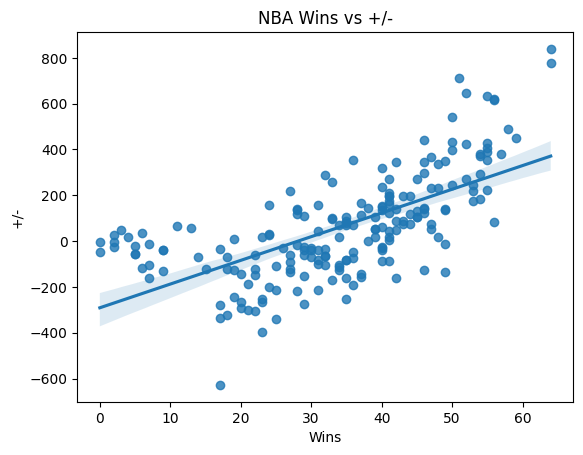

In [ ]:
#Scatter plot of Wins and +/-
plus_minus_scatter = sns.regplot(data = nba_contracts, x = nba_contracts["w"], y = nba_contracts["plus_minus"])

plt.title("NBA Wins vs +/-")
plt.xlabel("Wins")
plt.ylabel("+/-");

In [ ]:
nba_contracts["w"].corr(nba_contracts["plus_minus"])

0.6583818664270872

Based off of a simple scatterplot, we can see a cluster of 0's in the 0-10 win teams, and an upward trend as it progresses. This makes sense because if you have a team that has a lot more wins, they will most likely outscore the opponent, giving a higher +/- for a player. Also, grabbing the correlation coefficient, we can see that the wins and plus_minus has a fairly strong relationship with wins. This makes sense because players that win a lot tend to outscore the other team, leading to higher plus_minus totals.

### 2) When do we see contracts being signed?

The data includes years 2010 -2019 when players sign contracts. Of course, there is not an evenly distributed amount, so we should find when are most of the contracts being signed.

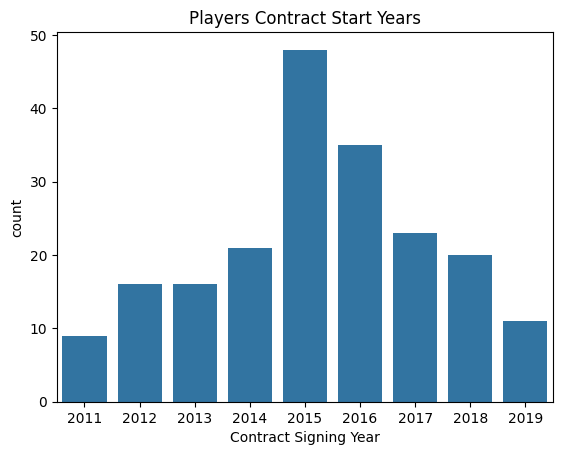

In [ ]:
#Making a countplot for contract_start
sns.countplot(data = nba_contracts, x = nba_contracts["contract_start"])
plt.title("Players Contract Start Years")
plt.xlabel("Contract Signing Year");

The majority of these contracts are from 2015-2017. A good question to ask is, why? Was there something coinciding at this time of the decade or is there a stat to look at?

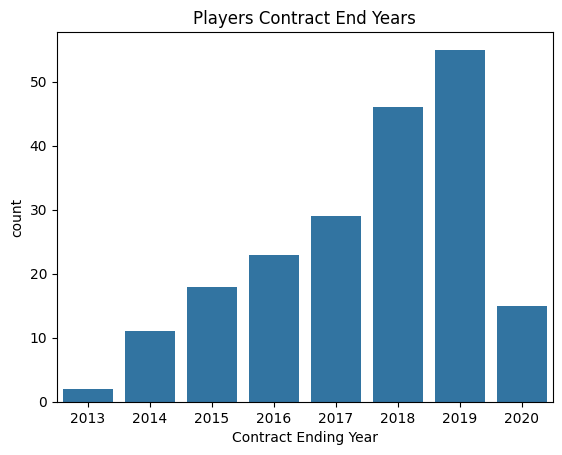

In [ ]:
#Making a countplot for contract_end
sns.countplot(data = nba_contracts, x = nba_contracts["contract_end"])
plt.title("Players Contract End Years")
plt.xlabel("Contract Ending Year");

If a lot of contracts are starting, then this should imply that a lot of contracts are ending the year prior. But instead we see the complete opposite of that. The second lowest amount of contracts ending is 2014, which either means a lot of rookies are signing new contracts or something regarding the salary rules have affected this stat.

#### 2015 MVP

Someone who changed the game of basketball is a player by the name of Stephen Curry. Stephen Curry is known for his 3-point shooting and forced teams to change their style of play because it was so dominant. Luckily, we have a statistic for 3 pointers in this database that can show us this increase in 2015.

In [ ]:
players_per_year = nba_contracts.groupby("contract_start").count()[["3pm"]].rename(columns={"3pm":"total_players"}).reset_index()

threes_by_year = nba_contracts[["3pm", "contract_start", "3pa", "3p_percentage"]]
threes_by_year = threes_by_year.groupby("contract_start").sum().rename(columns={"3pm":"total_3pm", "3pa":"total_3pa"}).reset_index()

total_threes = players_per_year.merge(threes_by_year, on = "contract_start", how = "left")
total_threes["3pm_avg"] = total_threes["total_3pm"] / total_threes["total_players"]
total_threes["3pa_avg"] = total_threes["total_3pa"] / total_threes["total_players"]
total_threes["3ppercentage_avg"] = total_threes["3p_percentage"] / total_threes["total_players"]
total_threes

,contract_start,total_players,total_3pm,total_3pa,3p_percentage,3pm_avg,3pa_avg,3ppercentage_avg
0,2011,9,453,1238,268.6,50.333333,137.555556,29.844444
1,2012,16,769,2183,412.7,48.062500,136.437500,25.793750
2,2013,16,1286,3310,491.1,80.375000,206.875000,30.693750
3,2014,21,1380,3847,609.5,65.714286,183.190476,29.023810
4,2015,48,2849,7972,1349.5,59.354167,166.083333,28.114583
5,2016,35,2301,6405,1003.2,65.742857,183.000000,28.662857
6,2017,23,1915,4965,853.7,83.260870,215.869565,37.117391
7,2018,20,886,2394,531.6,44.300000,119.700000,26.580000
8,2019,11,819,2302,395.1,74.454545,209.272727,35.918182


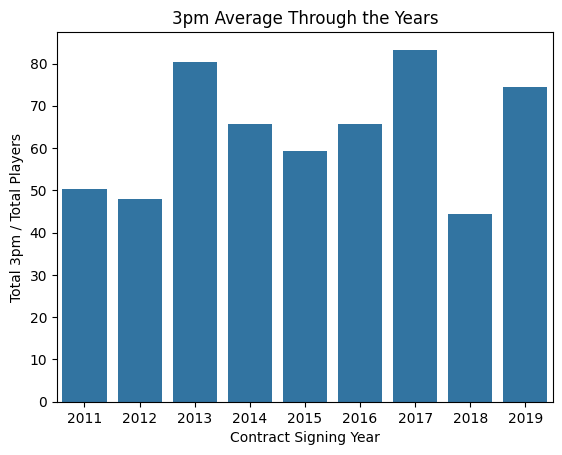

In [ ]:
three_pm = sns.barplot(data = total_threes, x = total_threes["contract_start"], y = total_threes["3pm_avg"])
plt.title("3pm Average Through the Years")
plt.xlabel("Contract Signing Year")
plt.ylabel("Total 3pm / Total Players");

In the above graph, we see a huge increase in average 3 pointers made from 2012 - 2013, a year where this change of the game can be seen. Although our original question of the 2014-2015 being the biggest change of three pointers wasn't the highest, the reason is that many of the players that signed a contract are players that never shoot threes but are good in other areas of the game. This is why we get a lower average because we have to include 0 3pm in this data.

One of the reasons why so many more contracts are being signed during the 2014-2015 seasons is because of a factor not counted in this dataset. In 2014-2015 the NBA signed a new TV deal with ESPN giving a lot more money to teams and changing a team's salary cap total from 58 million to, in 3 years time, 94 million in 2016-2017. Because of this increase in salary cap, players signed a lot of contracts because the league knew the cap would rise.

With this information, we should see an increase in player average salary as the years increase. Let's see if this is true.

### 3) Does salary increase throughout the years?

As explained above, the NBA increased each team's own salary cap by 30 million in 3 years time. With this information, we should see an increase in average player salaries, especially around 2015.

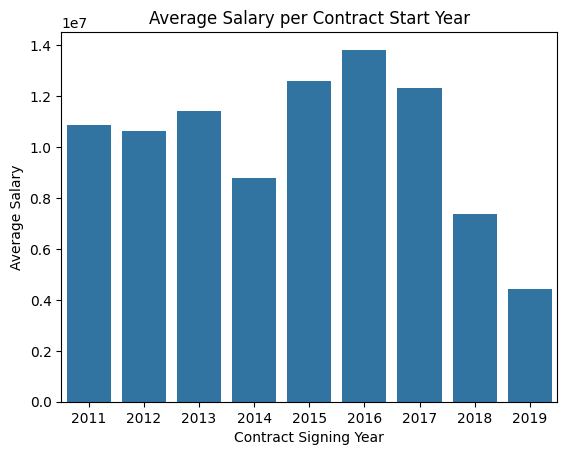

In [ ]:
avg_salary_per_year = nba_contracts.groupby("contract_start")
avg_salary_per_year = avg_salary_per_year[["avg_salary"]].mean().reset_index()
sns.barplot(data = avg_salary_per_year, x = avg_salary_per_year["contract_start"], y = avg_salary_per_year["avg_salary"])
plt.title("Average Salary per Contract Start Year")
plt.xlabel("Contract Signing Year")
plt.ylabel("Average Salary");

We do see an increase of avg_salary in 2015, but we cannot assume this is because of the NBA TV deal. Of course, we can think that the deal has a major impact on player salaries after 2014. What's interesting is that the 2018 and 2019 season don't have a a high avg_salary which doesn't coincide with the hypothesis of NBA salaries increasing. It's possible that the reason is that big name players are signing contracts in 2016 and 2017 which means their contract doesn't end until 2020 and after, which is not included in the dataset.

### 4) Which players take up the most cap space?

We understand that these contracts take up a certain amount of a team's salary cap, meaning a team can only spend a certain amount of money on players each year. Let's create a table and join it with the nba_contracts to show how much a team can spend each year. We will be taking the salary cap information from this website:
https://www.basketball-reference.com/contracts/salary-cap-history.html

In [ ]:
salary_cap = {"contract_start": [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020],
              "salary_cap": [58044000,
                             58044000,
                             58044000,
                             58679000,
                             63065000,
                             70000000,
                             94143000,
                             99093000,
                             101869000,
                             109140000,
                             109140000]}
salary_cap = pd.DataFrame(data = salary_cap)
salary_cap

,contract_start,salary_cap
0,2010,58044000
1,2011,58044000
2,2012,58044000
3,2013,58679000
4,2014,63065000
5,2015,70000000
6,2016,94143000
7,2017,99093000
8,2018,101869000
9,2019,109140000


In [ ]:
nba_contracts_salary = nba_contracts.merge(salary_cap, on = "contract_start")

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 10)
nba_contracts_salary

,name,contract_start,contract_end,avg_salary,age,gp,w,l,min,pts,fgm,fga,fg_percentage,3pm,3pa,3p_percentage,ftm,fta,ft_percentage,oreb,dreb,reb,ast,tov,stl,blk,pf,plus_minus,salary_cap
0,Wesley Matthews,2019,2020,2.564753e+06,32,69,27,42,2091,840,279,698,40.0,150,403,37.2,132,163,81.0,32,138,170,160,91,54,17,160,-90,109140000
1,JaMychal Green,2019,2020,4.767000e+06,29,65,31,34,1371,611,230,476,48.3,71,176,40.3,80,101,79.2,104,305,409,50,87,45,34,193,-214,109140000
2,Austin Rivers,2019,2020,2.174310e+06,26,76,45,31,2028,618,232,572,40.6,104,327,31.8,50,95,52.6,25,137,162,167,68,47,23,207,104,109140000
3,Kentavious Caldwell-Pope,2019,2020,8.139282e+06,26,82,37,45,2035,938,325,756,43.0,151,435,34.7,137,158,86.7,48,190,238,110,65,73,13,137,-156,109140000
4,Rodney Hood,2019,2020,5.718000e+06,26,72,29,43,1893,805,292,671,43.5,84,236,35.6,137,155,88.4,25,132,157,126,55,59,12,146,-273,109140000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,Danny Green,2012,2014,3.762500e+06,25,66,50,16,1522,603,211,477,44.2,102,234,43.6,79,100,79.0,54,174,228,86,67,58,46,107,244,58044000
195,Ian Mahinmi,2012,2015,4.000000e+06,25,61,36,25,1139,354,130,238,54.6,0,1,0.0,94,147,63.9,108,181,289,12,50,38,31,176,69,58044000
196,Danilo Gallinari,2012,2015,1.111019e+07,23,43,27,16,1351,628,193,466,41.4,60,183,32.8,182,209,87.1,28,174,202,116,68,42,23,86,218,58044000
197,Robin Lopez,2012,2014,5.119761e+06,24,64,32,32,895,348,124,269,46.1,0,0,0.0,100,140,71.4,90,119,209,20,43,18,60,128,-64,58044000


Now that we have data for how much a team can spend on players, we can calculate which player is taking up the most salary on their team.

In [ ]:
nba_contracts["percentage_salary"] = (nba_contracts_salary["avg_salary"] / nba_contracts_salary["salary_cap"]) * 100
nba_contracts_salary_top = nba_contracts.sort_values("percentage_salary", ascending = False).head(10)
nba_contracts_salary_top

,name,contract_start,contract_end,avg_salary,age,gp,w,l,min,pts,fgm,fga,fg_percentage,3pm,3pa,3p_percentage,ftm,fta,ft_percentage,oreb,dreb,reb,ast,tov,stl,blk,pf,plus_minus,percentage_salary
49,Rodney Hood,2019,2020,5718000.00,26,72,29,43,1893,805,292,671,43.5,84,236,35.6,137,155,88.4,25,132,157,126,55,59,12,146,-273,38.524250
147,Raymond Felton,2012,2015,4270000.00,28,60,28,32,1906,684,261,642,40.7,62,203,30.5,100,124,80.6,27,122,149,390,170,78,10,122,142,37.410664
150,Khris Middleton,2015,2019,17520689.60,23,79,40,39,2378,1055,406,869,46.7,109,268,40.7,134,156,85.9,48,299,347,182,113,122,11,183,320,36.586675
193,Patrick Beverley,2015,2018,5756757.00,26,56,35,21,1727,568,204,532,38.3,115,323,35.6,45,60,75.0,67,170,237,192,83,59,23,182,71,35.266350
152,LeBron James,2016,2017,32124579.50,31,76,56,20,2709,1920,737,1416,52.0,87,282,30.9,359,491,73.1,111,454,565,514,249,104,49,143,618,34.937210
114,Robin Lopez,2015,2018,13503875.00,27,59,38,21,1638,566,234,437,53.5,0,1,0.0,98,127,77.2,190,204,394,55,73,16,84,122,146,34.123174
155,Danilo Gallinari,2017,2019,21587579.00,28,63,31,32,2134,1145,335,750,44.7,126,324,38.9,349,387,90.2,39,286,325,135,82,40,15,93,159,33.716054
26,Kentavious Caldwell-Pope,2019,2020,8139282.00,26,82,37,45,2035,938,325,756,43.0,151,435,34.7,137,158,86.7,48,190,238,110,65,73,13,137,-156,33.302537
34,James Johnson,2014,2015,2500000.00,27,52,33,19,956,384,143,308,46.4,22,87,25.3,76,90,84.4,60,106,166,111,66,42,57,102,96,33.101392
77,Enes Kanter,2015,2018,17675529.25,23,75,32,43,2136,1163,482,928,51.9,16,45,35.6,183,234,78.2,277,394,671,55,145,36,29,189,-34,32.983047


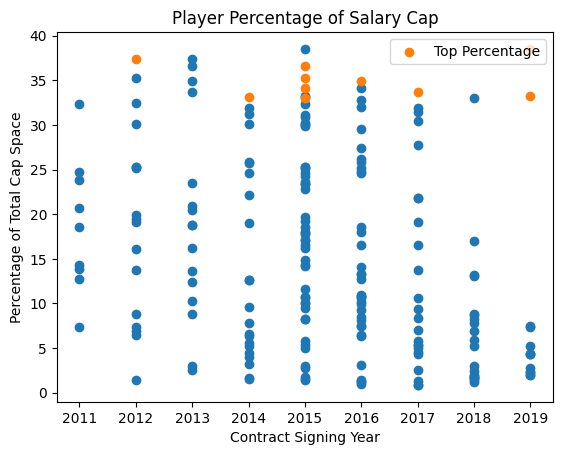

In [ ]:
x_list = nba_contracts_salary["contract_start"]
y_list = nba_contracts["percentage_salary"]

salary_scatter = plt.scatter(x_list,y_list)

salary_scatter_top = plt.scatter(nba_contracts_salary_top["contract_start"],nba_contracts_salary_top["percentage_salary"], label = "Top Percentage")
plt.legend()
plt.title("Player Percentage of Salary Cap")
plt.xlabel("Contract Signing Year")
plt.ylabel("Percentage of Total Cap Space");

As we look at the graph, the top percentages for salaries are 32% or above, meaning these top players are taking up 1/3 of their current teams total salary. Taking a quick glance at all their statistics, we see that each player has at least 1000 points in a season, at least 55 games played, and shooting at least 43% from the field. We also see an age range of 23-31, most of the players are in their prime. Which raises the question...

### 5) How much do players of certain ages make on average?


When players get drafted into the NBA the vast majority of them start off with a low salary. But then as they get older and get better and have more experience in the league they then get a pay raise and start making more. But then once they get towards the end of there career they usually dont make as much due to them being on the decline. This graph will show us how much on average each age group is making in there career.

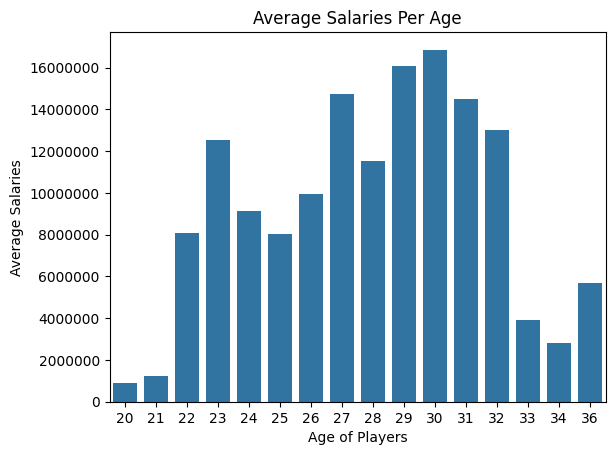

In [ ]:
#By using seaborn we take the nba_contracts DataFrame and take the Ages for the X axis
#and take the average salary for the y axis, as well as using ticklabel to get rid of the scientific notation
#for salaries
sns.barplot(data = nba_contracts, x = 'age', y = 'avg_salary', errorbar = None)
plt.xlabel("Age of Players")
plt.ylabel("Average Salaries")
plt.title("Average Salaries Per Age")
plt.ticklabel_format(style='plain', axis='y');

On the bar graph we see that players who enter in the NBA which is around ages 20 - 21 are making on average less than 2,000,000 dollars a year. But then we notice from ages 26-32 players are making on average between 10,000,000 - 16,000,000 dollars a year. Usually ages 25-32 is usually a players prime in the league and from that they develop there skills more and therefore becoming a more valuable asset in a lot of teams eyes, which means they can command a higher salary. But after the age of 32 there is a steep decline in average salary due to the fact that players are now pass there prime (unless your name is Lebron James). That means teams don't see them as valuable as they once were, which means money wise, at most would be earning either veteran minimum deals, or a mid level exception type money.

##Section 4: Approach

As you have already seen, we want to correctly find the avg_salary column using our models. The problem at hand is that this is not a categorical column, so we have to use regression. With these techniques, we gather MSE and RMSE for different models. After finding these results, we wanted to turn avg_salary into categories based on percentage of salaries to salary cap. We do this so we can get an accuracy for different models. Specifically, we used KNN, DT, RF, LR, and SVC. After this classification, we compared predictions vs actuals to tell us which players play better than value using regression techniques KNN, Random Forest, and SVR. We then asked asked more specific questions to determine avg_salary like "Does age and other factors predict avg_salary better?" instead of using columns that do not have as much impact in determing salary. Using other factors led us to ask "Can we predict other columns" such as points or whether is a good shooter or not. For the points, we used Linear Regression and for Good shooter or not we used Logistic Regression.

##Section 5: Preprocessing

In [ ]:
#Adding a length of contract column by subtracting the contract end year by the
#Contract start year
nba_contracts['length_of_contract'] = nba_contracts['contract_end']
- nba_contracts['contract_start']
nba_contracts

,name,contract_start,contract_end,avg_salary,age,gp,w,l,min,pts,fgm,fga,fg_percentage,3pm,3pa,3p_percentage,ftm,fta,ft_percentage,oreb,dreb,reb,ast,tov,stl,blk,pf,plus_minus,percentage_salary,length_of_contract
0,Wesley Matthews,2019,2020,2.564753e+06,32,69,27,42,2091,840,279,698,40.0,150,403,37.2,132,163,81.0,32,138,170,160,91,54,17,160,-90,2.349966,2020
1,Brook Lopez,2015,2017,2.116568e+07,27,72,34,38,2100,1236,506,987,51.3,1,10,10.0,223,274,81.4,214,321,535,50,104,43,126,206,-104,4.367784,2017
2,DeAndre Jordan,2011,2014,1.075976e+07,22,80,31,49,2047,566,234,341,68.6,0,1,0.0,98,217,45.2,207,368,575,42,101,41,142,255,-100,1.992221,2014
3,Markieff Morris,2015,2018,8.143324e+06,25,82,39,43,2581,1258,512,1100,46.5,57,179,31.8,177,232,76.3,110,396,506,192,170,101,39,245,105,7.457653,2018
4,Dwight Howard,2018,2019,1.341074e+07,32,81,35,46,2463,1347,506,911,55.5,1,7,14.3,334,582,57.4,255,757,1012,105,208,48,131,249,89,5.239142,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,Brook Lopez,2012,2014,1.469367e+07,24,5,2,3,136,96,38,77,49.4,0,0,0.0,20,32,62.5,8,10,18,6,6,1,4,8,-27,6.482151,2014
195,Nikola Vucevic,2015,2018,1.200000e+07,24,74,21,53,2529,1428,631,1206,52.3,2,6,33.3,164,218,75.2,238,572,810,147,148,54,54,220,-302,6.891324,2018
196,Aron Baynes,2015,2017,5.766667e+06,28,70,49,21,1122,461,185,327,56.6,1,4,25.0,90,104,86.5,109,209,318,35,65,16,22,162,136,19.140986,2017
197,Andre Iguodala,2013,2016,1.200000e+07,29,80,57,23,2779,1038,396,879,45.1,91,287,31.7,155,270,57.4,82,341,423,433,206,139,52,127,380,8.820483,2016


Here we use these columns to predict avg_salary for both Regression and Classifiers.

In [ ]:
X = nba_contracts[["contract_start",
                   "contract_end",
                   "age", "gp", "w", "l",
                   "min", "pts",
                   "fgm", "fga", "fg_percentage",
                   "3pm", "3pa", "3p_percentage",
                   "ftm", "fta", "ft_percentage",
                   "oreb", "dreb",
                   "ast", "tov", "stl", "blk",
                   "pf", "plus_minus"]]
y = nba_contracts["avg_salary"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((159, 25), (40, 25), (159,), (40,))

---

## Section: 6 Results

This section will eventually become your results section.

Don't include anything here with your first submission of this file.

### Predicting avg_salary using Different Algorithms

Since we have a continuous variable as our target, we will be using Regression techniques to find the which model accurately predicts salary while passing in all of the continuous variables.

##### KNN Regression

In [ ]:
#Show nba_contracts table
nba_contracts

,name,contract_start,contract_end,avg_salary,age,gp,w,l,min,pts,fgm,fga,fg_percentage,3pm,3pa,3p_percentage,ftm,fta,ft_percentage,oreb,dreb,reb,ast,tov,stl,blk,pf,plus_minus,percentage_salary,length_of_contract
0,Wesley Matthews,2019,2020,2.564753e+06,32,69,27,42,2091,840,279,698,40.0,150,403,37.2,132,163,81.0,32,138,170,160,91,54,17,160,-90,2.349966,2020
1,Brook Lopez,2015,2017,2.116568e+07,27,72,34,38,2100,1236,506,987,51.3,1,10,10.0,223,274,81.4,214,321,535,50,104,43,126,206,-104,4.367784,2017
2,DeAndre Jordan,2011,2014,1.075976e+07,22,80,31,49,2047,566,234,341,68.6,0,1,0.0,98,217,45.2,207,368,575,42,101,41,142,255,-100,1.992221,2014
3,Markieff Morris,2015,2018,8.143324e+06,25,82,39,43,2581,1258,512,1100,46.5,57,179,31.8,177,232,76.3,110,396,506,192,170,101,39,245,105,7.457653,2018
4,Dwight Howard,2018,2019,1.341074e+07,32,81,35,46,2463,1347,506,911,55.5,1,7,14.3,334,582,57.4,255,757,1012,105,208,48,131,249,89,5.239142,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,Brook Lopez,2012,2014,1.469367e+07,24,5,2,3,136,96,38,77,49.4,0,0,0.0,20,32,62.5,8,10,18,6,6,1,4,8,-27,6.482151,2014
195,Nikola Vucevic,2015,2018,1.200000e+07,24,74,21,53,2529,1428,631,1206,52.3,2,6,33.3,164,218,75.2,238,572,810,147,148,54,54,220,-302,6.891324,2018
196,Aron Baynes,2015,2017,5.766667e+06,28,70,49,21,1122,461,185,327,56.6,1,4,25.0,90,104,86.5,109,209,318,35,65,16,22,162,136,19.140986,2017
197,Andre Iguodala,2013,2016,1.200000e+07,29,80,57,23,2779,1038,396,879,45.1,91,287,31.7,155,270,57.4,82,341,423,433,206,139,52,127,380,8.820483,2016


Our first model we are using is KNN regression.

In [ ]:
#Set KNeighborsRegressor
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
#Use the model to predict
y_pred_knn = knn_model.predict(X_test)
y_pred_knn

array([ 4484768.55      , 14731192.33666667,  1857379.9       ,
       14254087.48      , 26147615.56      ,  8047000.        ,
        5401385.06666667,  1820299.6       ,  4271345.35      ,
        6310000.06666667,  2015221.85      ,  5225012.93333333,
       27072531.46      , 15878746.86666667,  7813400.        ,
        6338413.26666667,  7120036.8       , 16373887.51666667,
       13280251.23333333, 13658333.33333333, 19255929.66666667,
        3844216.5       ,  5159999.93333333,  1557379.9       ,
       12800090.        ,  3602696.8       ,  5047988.6       ,
        7657775.06666667, 14502694.71666666,  3844216.5       ,
        5662500.06666667, 14052095.        , 13787352.23333333,
        4269020.8       ,  7007400.        , 15238781.66666667,
        5908666.6       , 19506343.98333333, 18911846.2       ,
        5059738.4       ])

In [ ]:
#Total Mean Squared Error (KNN)
mse = np.mean((y_pred_knn - y_test)**2)
mse

22584976915136.285

In [ ]:
#RMSE (KNN)
rmse = np.sqrt(mse)
rmse

4752365.402106227

Our first model, KNN gives us a RMSE of 5,259,844 million dollars. We can interpret this as when we use KNN, the prediction on average will be off by 5.2 million. We continue this process of using KNN but we try and find the best parameters using GridSearch.

###### Best KNN Parameters

In [ ]:
#List of parameters being passed in
parameters = {"n_neighbors": [1,2,3,4,5,6,7,8,9, 15, 20],
              "weights": ["uniform", "distance"],
              "p": [1,2],
              "algorithm": ["auto", "ball_tree", "kd_tree", "brute"]}

#GridSearchCV with knn_model to find best paramters
grid_search = GridSearchCV(knn_model, parameters, cv = 5, return_train_score = True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 15, 20],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             return_train_score=True)

In [ ]:
#Finding best parameters on GridSearchCV
grid_search.best_params_

{'algorithm': 'auto', 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}

In [ ]:
#Setting best model with the best parameters found
knn_model_7 = KNeighborsRegressor(algorithm = "ball_tree", n_neighbors = 7, p = 2, weights = "distance")
best_parameters = {"algorithm": ["ball_tree"], "n_neighbors": [7], "p" : [2], "weights" : ["distance"]}

knn_model_7.fit(X_train, y_train)

KNeighborsRegressor(algorithm='ball_tree', n_neighbors=7, weights='distance')

In [ ]:
#Using the best model to predict X_test
y_test_preds = knn_model_7.predict(X_test)
mse = np.mean((y_test_preds - y_test)**2)
mse

23280202193889.29

In [ ]:
#Root mean squared error from MSE
rmse = np.sqrt(mse)
rmse

4824956.185696331

After getting our first model done, we got a best RMSE of 5,026,770. This means our predictions with KNN are off by around $5 million average salary.

##### Random Forest Regressor

We continue to this process to see which model can most accurately get average salaries correctly.

In [ ]:
#Set RandomForestRegressor
rnd_forest = RandomForestRegressor(max_features = 25, random_state = 0)
rnd_forest.fit(X_train, y_train)

RandomForestRegressor(max_features=25, random_state=0)

In [ ]:
#Predict with RF regressor
y_test_pred_rf = rnd_forest.predict(X_test)
y_test_pred_rf

array([ 9725370.72916667, 16084380.7275    ,  3072625.92083333,
       12749596.95483334, 19321866.25616666, 14950443.27283333,
        6906025.155     ,  5024018.02166667,  3709121.2       ,
        8732239.77916667,  3357737.35166667,  4665142.76666667,
       22684373.33233333, 17804554.7435    ,  8157827.21833333,
        8974688.581     ,  9180005.85833333, 20387289.67966668,
       17436143.74966666, 13174185.431     , 16778292.82533333,
        3341861.69666667, 11744893.65583334,  2168908.23333333,
       13802066.67183333,  4953635.245     ,  6671997.60666667,
        9003627.92433333, 13451557.06283333,  3341861.69666667,
        5585301.72      , 14616939.16066667, 13844177.8635    ,
        2175129.965     ,  7357371.56      , 14195508.20816667,
        4916152.92416667, 22113938.39916667, 16814609.67916666,
        7209640.79583333])

In [ ]:
#MSE of randomforestregressor
mse_RF = np.mean((y_test_pred_rf - y_test)**2)
mse_RF

17576779045126.006

In [ ]:
#RMSE of MSE
rmse = np.sqrt(mse_RF)
rmse

4192466.94025439

Random Forest will turn out to be our lowest RMSE value out of all the regression models. The reason for trying Random Forests is because when splitting to find values for certain points, our dataset has a lot of variables that it can split from. With Random Forest, we can look at what is the most important columns to split against to take into consideration for later simulations.

###### Best RF Parameters

In [ ]:
#Putting all possible parameters in a param_grid
param_grid = {
    "n_estimators" : [100, 200, 500],
    "max_features" : ["auto", "sqrt", "log2"],
    "max_depth" : [None, 40, 80, 120]
    }

In [ ]:
#GridSearch on RF to find best parameters
grid_search = GridSearchCV(estimator = rnd_forest, param_grid = param_grid, cv = 5, return_train_score = True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_features=25, random_state=0),
             param_grid={'max_depth': [None, 40, 80, 120],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 500]},
             return_train_score=True)

In [ ]:
#Best params for RF
grid_search.best_params_

{'max_depth': None, 'max_features': 'auto', 'n_estimators': 200}

In [ ]:
#Setting best parameters
rnd_clf_best = RandomForestRegressor(max_depth = None, max_features = "sqrt", n_estimators = 500, random_state = 0)
rnd_clf_best.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=500, random_state=0)

In [ ]:
#MSE of best RF
y_test_preds = rnd_clf_best.predict(X_test)
mse = np.mean((y_test_preds - y_test)**2)
mse

16582604817807.625

In [ ]:
#RMSE of best RF
rmse = np.sqrt(mse)
rmse

4072174.4581743577

##### Regression Trees

In [ ]:
#Set DecisionTreeRegressor
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
#Predicting using DecisionTree
y_pred_dt = dt_reg.predict(X_test)
y_pred_dt

array([16536533.        , 17675529.25      ,  1918572.5       ,
       12500000.        , 17699435.25      ,  7472500.        ,
        7000000.        ,  8000000.        ,  2000000.        ,
        7000000.        ,  1125488.5       ,  4140721.        ,
       19784243.4       , 13503875.        ,   981792.        ,
       10000000.        ,  4250000.        , 21587579.        ,
       13503875.        , 12000000.        ,  9500000.        ,
        1302356.33333333, 16536533.        ,  1922638.        ,
       11000000.        ,  2564753.        ,  7000000.        ,
       10000000.        , 21754050.8       ,  1302356.33333333,
        3000000.        , 14693906.33333333, 12000000.        ,
        2793470.        , 10000000.        , 10000000.        ,
        7000000.        , 23752241.66666667, 13760025.        ,
        4325064.33333333])

In [ ]:
#MSE of DecisionTree
mse_dt = np.mean((y_pred_dt - y_test)**2)
mse_dt

29269671955259.0

In [ ]:
#RMSE of DT regressor
rmse = np.sqrt(mse_dt)
rmse

5410145.280420758

###### Best DT Parameters

In [ ]:
#Param grid with all DT parameters
param_grid = {
    "max_depth" : [None, 10, 20, 30, 40, 50],
    "min_samples_split" : [2, 5, 10, 50, 100, 1000],
    "min_samples_leaf": [5, 10, 15, 50, 100, 1000]
}

In [ ]:
#GridSearch with param_grid
grid_search_dt = GridSearchCV(estimator = dt_reg, param_grid = param_grid, cv = 5, scoring = "accuracy")
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [5, 10, 15, 50, 100, 1000],
                         'min_samples_split': [2, 5, 10, 50, 100, 1000]},
             scoring='accuracy')

In [ ]:
#Best Parameters for DT
grid_search_dt.best_params_

{'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [ ]:
#Setting DT Regressor and predicting
dt_reg_best = DecisionTreeRegressor(max_depth = None, min_samples_leaf = 5, min_samples_split = 2)
dt_reg_best.fit(X_train, y_train)

y_test_preds = dt_reg_best.predict(X_test)

#MSE of best DT Regressor
mse = np.mean((y_test_preds - y_test)**2)
mse

21748385623935.348

In [ ]:
#RMSE of best DT regressor
rmse = np.sqrt(mse)
rmse

4663516.444051135

### Turning avg_salary to "Below 10%", "10% - 20%", "20% - 30%", "Higher than 30%"

The goal of this section is to turn the avg_salary into a categorical value and predict it using classifiers. In this section, we separate the categories into sections based on total percentage of each salary cap. Every team each year has the same amount of money available to spend on players but throughout the years, the salary cap increases. So, to account for inflation, we calculate the percentage of how much the avg_salary  takes up each cap space and categorize the salary that way.

In [ ]:
#Creating an avg_salary_category based on percentage of salary cap
nba_contracts["avg_salary_category"] = pd.cut(x =
                                              nba_contracts["percentage_salary"],
                                              bins = [0, 10, 20,
                                                      30, 100],
                                              labels = ["Below 10%", "10% - 20%"
                                              , "20% - 30%", "Higher than 30%"])

In [ ]:
#LabelEncoding the avg_salary_category
label_encoder = LabelEncoder()

nba_contracts["avg_salary_enc"] = label_encoder.fit_transform(nba_contracts["avg_salary_category"])

nba_contracts

,name,contract_start,contract_end,avg_salary,age,gp,w,l,min,pts,fgm,fga,fg_percentage,3pm,3pa,3p_percentage,ftm,fta,ft_percentage,oreb,dreb,reb,ast,tov,stl,blk,pf,plus_minus,percentage_salary,length_of_contract,avg_salary_category,avg_salary_enc
0,Wesley Matthews,2019,2020,2.564753e+06,32,69,27,42,2091,840,279,698,40.0,150,403,37.2,132,163,81.0,32,138,170,160,91,54,17,160,-90,2.349966,2020,Below 10%,2
1,Brook Lopez,2015,2017,2.116568e+07,27,72,34,38,2100,1236,506,987,51.3,1,10,10.0,223,274,81.4,214,321,535,50,104,43,126,206,-104,4.367784,2017,Below 10%,2
2,DeAndre Jordan,2011,2014,1.075976e+07,22,80,31,49,2047,566,234,341,68.6,0,1,0.0,98,217,45.2,207,368,575,42,101,41,142,255,-100,1.992221,2014,Below 10%,2
3,Markieff Morris,2015,2018,8.143324e+06,25,82,39,43,2581,1258,512,1100,46.5,57,179,31.8,177,232,76.3,110,396,506,192,170,101,39,245,105,7.457653,2018,Below 10%,2
4,Dwight Howard,2018,2019,1.341074e+07,32,81,35,46,2463,1347,506,911,55.5,1,7,14.3,334,582,57.4,255,757,1012,105,208,48,131,249,89,5.239142,2019,Below 10%,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,Brook Lopez,2012,2014,1.469367e+07,24,5,2,3,136,96,38,77,49.4,0,0,0.0,20,32,62.5,8,10,18,6,6,1,4,8,-27,6.482151,2014,Below 10%,2
195,Nikola Vucevic,2015,2018,1.200000e+07,24,74,21,53,2529,1428,631,1206,52.3,2,6,33.3,164,218,75.2,238,572,810,147,148,54,54,220,-302,6.891324,2018,Below 10%,2
196,Aron Baynes,2015,2017,5.766667e+06,28,70,49,21,1122,461,185,327,56.6,1,4,25.0,90,104,86.5,109,209,318,35,65,16,22,162,136,19.140986,2017,10% - 20%,0
197,Andre Iguodala,2013,2016,1.200000e+07,29,80,57,23,2779,1038,396,879,45.1,91,287,31.7,155,270,57.4,82,341,423,433,206,139,52,127,380,8.820483,2016,Below 10%,2


Can we classify each avg_salary category?

Here we will use the same columns as the Regression techniques.

In [ ]:
#Setting X and y to the same columns as regression
X = nba_contracts[["contract_start", "contract_end", "age", "gp", "w", "l", "min", "pts", "fgm", "fga", "3pm", "3pa", "ftm", "fta", "oreb", "dreb", "ast", "tov", "stl", "blk", "pf", "plus_minus"]]
y = nba_contracts["avg_salary_category"]

In [ ]:
#Splitting X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 0)

##### KNN Classifier

In [ ]:
#Setting KNN Classifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
#Predicting using KNN Classifier
y_test_preds = knn_model.predict(X_test)

y_train_preds = knn_model.predict(X_train)

y_test_preds

array(['Below 10%', '20% - 30%', '10% - 20%', '10% - 20%', 'Below 10%',
       '10% - 20%', 'Below 10%', '10% - 20%', '20% - 30%', '20% - 30%',
       '10% - 20%', '10% - 20%', 'Below 10%', '10% - 20%', '10% - 20%',
       'Below 10%', '10% - 20%', 'Below 10%', '10% - 20%', '10% - 20%',
       '10% - 20%', 'Below 10%', '10% - 20%', '10% - 20%', 'Below 10%',
       'Below 10%', 'Below 10%', '20% - 30%', 'Below 10%', 'Below 10%',
       '20% - 30%', '10% - 20%', '10% - 20%', 'Below 10%',
       'Higher than 30%', 'Below 10%', 'Below 10%', '10% - 20%',
       '10% - 20%', 'Below 10%'], dtype=object)

In [ ]:
#KNN test
acc_test = (y_test_preds == y_test).sum()/len(y_test)

acc_test

0.25

In [ ]:
#KNN train
acc_train = (y_train_preds == y_train).sum()/len(y_train)
acc_train

0.610062893081761

In [ ]:
#KNN crosstab
pd.crosstab(y_test_preds, y_test)

avg_salary_category,Below 10%,10% - 20%,20% - 30%,Higher than 30%
row_0,,,,
10% - 20%,10,3,5,0
20% - 30%,1,4,0,0
Below 10%,6,3,3,4
Higher than 30%,0,0,0,1


By looking at the crosstab, we can see the KNN model start to classify most of the values as below 10% when in actual, the value lies between 10%-20%.

###### KNN Best Parameters

In [ ]:
#Parameters passed in for KNN
parameters = {"n_neighbors" : [17, 19, 25, 30, 50], "p" : [1,2]}

In [ ]:
#GridSearch to find best parameters
grid_search = GridSearchCV(KNeighborsClassifier(), parameters, cv = 5, return_train_score = True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [17, 19, 25, 30, 50], 'p': [1, 2]},
             return_train_score=True)

In [ ]:
#Best parameters for KNN
grid_search.best_params_

{'n_neighbors': 19, 'p': 1}

In [ ]:
#Passing in best parameters and predicting with that model
knn_model_best = KNeighborsClassifier(n_neighbors = 30, p = 1)
knn_model_best.fit(X_train, y_train)

y_pred_test_knn = knn_model_best.predict(X_test)
y_pred_test_knn

array(['Below 10%', 'Below 10%', 'Below 10%', '10% - 20%', 'Below 10%',
       'Below 10%', 'Below 10%', 'Below 10%', 'Below 10%', 'Below 10%',
       'Below 10%', 'Below 10%', 'Below 10%', '10% - 20%', 'Below 10%',
       'Below 10%', 'Below 10%', '10% - 20%', '10% - 20%', 'Below 10%',
       'Below 10%', 'Below 10%', 'Below 10%', 'Below 10%', '10% - 20%',
       'Below 10%', 'Below 10%', 'Below 10%', '10% - 20%', 'Below 10%',
       'Below 10%', 'Below 10%', '10% - 20%', 'Below 10%', 'Below 10%',
       '10% - 20%', 'Below 10%', '10% - 20%', 'Below 10%', 'Below 10%'],
      dtype=object)

In [ ]:
#Test accuracy for best KNN
acc_knn_best = (y_pred_test_knn == y_test).sum() / len(y_test)
acc_knn_best

0.4

##### Decision Tree Classifier

In [ ]:
#Setting DT Classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
#Predicting X_test using DT
y_test_preds = dt_model.predict(X_test)

y_train_preds = dt_model.predict(X_train)

y_test_preds

array(['20% - 30%', '10% - 20%', 'Below 10%', '10% - 20%', '20% - 30%',
       '10% - 20%', '10% - 20%', 'Below 10%', 'Below 10%', 'Below 10%',
       'Higher than 30%', '20% - 30%', 'Below 10%', '10% - 20%',
       'Below 10%', 'Higher than 30%', 'Below 10%', 'Below 10%',
       '10% - 20%', '10% - 20%', '10% - 20%', '10% - 20%', 'Below 10%',
       '10% - 20%', 'Below 10%', 'Higher than 30%', 'Higher than 30%',
       '10% - 20%', 'Below 10%', '10% - 20%', '10% - 20%', '10% - 20%',
       'Below 10%', 'Below 10%', '10% - 20%', '20% - 30%', '10% - 20%',
       '10% - 20%', '10% - 20%', '10% - 20%'], dtype=object)

In [ ]:
#DT test accuracy
acc_test = (y_test_preds == y_test).sum()/len(y_test)

acc_test

0.35

In [ ]:
#DT train accuracy
acc_train = (y_train_preds == y_train).sum()/len(y_train)
acc_train

1.0

In [ ]:
#DT crosstab
pd.crosstab(y_test_preds, y_test)

avg_salary_category,Below 10%,10% - 20%,20% - 30%,Higher than 30%
row_0,,,,
10% - 20%,8,6,3,2
20% - 30%,1,0,1,2
Below 10%,7,4,1,1
Higher than 30%,1,0,3,0


For this model, DT looks to be predicting most of the values as 20%-30% rather than above 30% and vice versa.

###### Decision Tree Best Parameters

In [ ]:
#Passing in different parameters for DT
parameters = {"criterion": ["gini", "entropy"],
              "max_depth": [1, 3, 5, 7, 9, 10, 20, 30, 35, 40, 50]}

In [ ]:
#GridSearchCv for DT
grid_search = GridSearchCV(DecisionTreeClassifier(random_state = 0), parameters, cv = 5, return_train_score = True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 5, 7, 9, 10, 20, 30, 35, 40, 50]},
             return_train_score=True)

In [ ]:
#Best parameters for DT
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [ ]:
#Setting best parameters into a best model
dt_model_best = DecisionTreeClassifier(criterion = "gini", max_depth = 7)
dt_model_best.fit(X_train, y_train)

#Predicting with best DT model
y_pred_test_dt = dt_model_best.predict(X_test)
y_pred_test_dt

array(['20% - 30%', '10% - 20%', 'Below 10%', '10% - 20%', '20% - 30%',
       '10% - 20%', 'Below 10%', 'Below 10%', 'Below 10%', 'Below 10%',
       'Higher than 30%', '20% - 30%', 'Below 10%', '10% - 20%',
       'Below 10%', '20% - 30%', 'Below 10%', 'Below 10%', '10% - 20%',
       '10% - 20%', '10% - 20%', 'Higher than 30%', 'Below 10%',
       'Higher than 30%', 'Higher than 30%', 'Below 10%',
       'Higher than 30%', '10% - 20%', 'Below 10%', 'Higher than 30%',
       '10% - 20%', '10% - 20%', 'Below 10%', 'Below 10%', '10% - 20%',
       '20% - 30%', 'Below 10%', '10% - 20%', '10% - 20%', '10% - 20%'],
      dtype=object)

In [ ]:
#Best parameters for DT
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=5, random_state=0)

In [ ]:
#DT best accuracy
acc_dt_best = (y_pred_test_dt == y_test).sum() / len(y_test)
acc_dt_best

0.35

##### Random Forest Classifier

In [ ]:
#Setting RF
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
#Predicting with RF model
y_test_preds = rf_model.predict(X_test)

y_train_preds = rf_model.predict(X_train)

y_test_preds

array(['Below 10%', '10% - 20%', 'Below 10%', 'Below 10%', 'Below 10%',
       'Below 10%', '10% - 20%', 'Below 10%', 'Below 10%', 'Below 10%',
       '10% - 20%', '20% - 30%', 'Below 10%', '10% - 20%', 'Below 10%',
       'Below 10%', 'Below 10%', '10% - 20%', '10% - 20%', '10% - 20%',
       'Below 10%', '10% - 20%', 'Higher than 30%', 'Below 10%',
       'Below 10%', 'Below 10%', 'Below 10%', '10% - 20%', '10% - 20%',
       '10% - 20%', 'Below 10%', '10% - 20%', '10% - 20%', 'Below 10%',
       'Below 10%', '10% - 20%', 'Below 10%', '10% - 20%', 'Below 10%',
       'Below 10%'], dtype=object)

In [ ]:
#Test accuracy for DT
acc_test = (y_test_preds == y_test).sum()/len(y_test)

acc_test

0.425

In [ ]:
#Train accuracy for DT
acc_train = (y_train_preds == y_train).sum()/len(y_train)
acc_train

1.0

In [ ]:
#DT crosstab
pd.crosstab(y_test_preds, y_test)

avg_salary_category,Below 10%,10% - 20%,20% - 30%,Higher than 30%
row_0,,,,
10% - 20%,6,5,2,2
20% - 30%,0,0,1,0
Below 10%,11,5,4,3
Higher than 30%,0,0,1,0


In this crosstab, it seems that the model predicts higher than its actual values, as we can see in the 10%-20% predicting it as 20%-30%.

###### Random Forest Best Parameters

In [ ]:
#Passing in parameters for GridSearch
parameters = {"n_estimators": [100, 200, 300, 400],
              "max_depth": [10, 20, 30, 40, 50, 60],
              "min_samples_split": [2, 4, 6, 8],
              "min_samples_leaf": [1, 2, 3, 4]}

In [ ]:
#GridSearchCV to find best params
grid_search = GridSearchCV(RandomForestClassifier(random_state = 0), parameters, cv = 5, return_train_score = True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [10, 20, 30, 40, 50, 60],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [100, 200, 300, 400]},
             return_train_score=True)

In [ ]:
#Best Params for RF
grid_search.best_params_

{'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

In [ ]:
#Setting best params to a RF model
rf_model_best = RandomForestClassifier(max_depth = 10, min_samples_leaf =  2, min_samples_split = 2, n_estimators = 400)
rf_model_best.fit(X_train, y_train)

#Predicting X_test sing best parameters
y_pred_test_rf = rf_model_best.predict(X_test)
y_pred_test_rf

array(['Below 10%', '10% - 20%', 'Below 10%', 'Below 10%', 'Below 10%',
       'Below 10%', '10% - 20%', 'Below 10%', 'Below 10%', 'Below 10%',
       '10% - 20%', '20% - 30%', 'Below 10%', '10% - 20%', 'Below 10%',
       'Below 10%', 'Below 10%', '10% - 20%', '10% - 20%', '10% - 20%',
       'Below 10%', '10% - 20%', 'Below 10%', 'Below 10%', '10% - 20%',
       'Below 10%', 'Below 10%', '10% - 20%', '10% - 20%', '10% - 20%',
       '10% - 20%', '10% - 20%', 'Below 10%', 'Below 10%', 'Below 10%',
       '10% - 20%', 'Below 10%', '10% - 20%', 'Below 10%', 'Below 10%'],
      dtype=object)

In [ ]:
#Best params for RF
grid_search.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_leaf=3, min_samples_split=8,
                       n_estimators=300, random_state=0)

In [ ]:
#Test accuracy for best RF
acc_rf_best = (y_pred_test_rf == y_test).sum() / len(y_test)
acc_rf_best

0.45

##### Logistic Regression

In [ ]:
#Setting LR
lr_model = LogisticRegression(multi_class = "multinomial")
lr_model.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [ ]:
#Predicting X_test using LR
y_test_preds = lr_model.predict(X_test)

y_train_preds = rf_model.predict(X_train)

y_test_preds

array(['Below 10%', 'Below 10%', 'Below 10%', 'Below 10%', 'Below 10%',
       'Below 10%', 'Below 10%', 'Below 10%', 'Below 10%', 'Below 10%',
       'Below 10%', '20% - 30%', 'Below 10%', '10% - 20%', 'Below 10%',
       'Below 10%', 'Below 10%', '10% - 20%', '10% - 20%', 'Below 10%',
       'Below 10%', 'Below 10%', 'Below 10%', 'Below 10%', '20% - 30%',
       'Below 10%', 'Below 10%', 'Below 10%', '10% - 20%', 'Below 10%',
       'Below 10%', 'Below 10%', 'Below 10%', 'Below 10%', 'Below 10%',
       '10% - 20%', 'Below 10%', '10% - 20%', 'Below 10%', 'Below 10%'],
      dtype=object)

In [ ]:
#LR test accuracy
acc_test = (y_test_preds == y_test).sum()/len(y_test)

acc_test

0.425

In [ ]:
#LR train accuracy
acc_train = (y_train_preds == y_train).sum()/len(y_train)
acc_train

1.0

In [ ]:
#LR crosstab
pd.crosstab(y_test_preds, y_test)

avg_salary_category,Below 10%,10% - 20%,20% - 30%,Higher than 30%
row_0,,,,
10% - 20%,2,2,0,2
20% - 30%,1,0,1,0
Below 10%,14,8,7,3


Logistic Regression is also showing that its predictions are higher than the actual values.

###### Logistic Regression Best Parameters

In [ ]:
#Passing in parameter values into LR
parameters = {"C": [0.001, 0.001, 0.1, 1, 10],
              "penalty": ["l1", "l2"],
              "solver": ["liblinear", "saga"]}

In [ ]:
#GridSearchCV to find best params
grid_search = GridSearchCV(LogisticRegression(random_state = 0), parameters, cv = 5, scoring = "accuracy", return_train_score = True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0),
             param_grid={'C': [0.001, 0.001, 0.1, 1, 10],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             return_train_score=True, scoring='accuracy')

In [ ]:
#LR best params
grid_search.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}

In [ ]:
#Setting best params and predicting it
lr_model_best = LogisticRegression(C = 0.001, penalty = "l2", solver = "liblinear")
lr_model_best.fit(X_train, y_train)

y_pred_test_lr = lr_model_best.predict(X_test)
y_pred_test_lr

array(['Below 10%', 'Below 10%', '20% - 30%', 'Below 10%', 'Below 10%',
       'Below 10%', '10% - 20%', '20% - 30%', 'Below 10%', 'Below 10%',
       '20% - 30%', '20% - 30%', 'Below 10%', '10% - 20%', 'Below 10%',
       'Below 10%', '10% - 20%', 'Below 10%', '10% - 20%', 'Below 10%',
       'Below 10%', 'Below 10%', 'Below 10%', 'Below 10%', '20% - 30%',
       'Below 10%', 'Below 10%', 'Below 10%', '10% - 20%', 'Below 10%',
       'Below 10%', 'Below 10%', 'Below 10%', 'Below 10%', 'Below 10%',
       '10% - 20%', 'Below 10%', 'Below 10%', 'Below 10%', 'Below 10%'],
      dtype=object)

In [ ]:
#LR best test accuracy
acc_lr_best = (y_pred_test_lr == y_test).sum() / len(y_test)
acc_lr_best

0.425

##### SV Classifier

In [ ]:
#Setting SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [ ]:
#Predicting X_test with SVC
y_test_preds = svc_model.predict(X_test)

y_train_preds = svc_model.predict(X_train)

y_test_preds

array(['Below 10%', 'Below 10%', 'Below 10%', 'Below 10%', 'Below 10%',
       'Below 10%', 'Below 10%', 'Below 10%', 'Below 10%', 'Below 10%',
       'Below 10%', 'Below 10%', 'Below 10%', 'Below 10%', 'Below 10%',
       'Below 10%', 'Below 10%', 'Below 10%', 'Below 10%', 'Below 10%',
       'Below 10%', 'Below 10%', 'Below 10%', 'Below 10%', 'Below 10%',
       'Below 10%', 'Below 10%', 'Below 10%', 'Below 10%', 'Below 10%',
       'Below 10%', 'Below 10%', 'Below 10%', 'Below 10%', 'Below 10%',
       'Below 10%', 'Below 10%', 'Below 10%', 'Below 10%', 'Below 10%'],
      dtype=object)

In [ ]:
#SVC test accuracy
acc_test = (y_test_preds == y_test).sum()/len(y_test)

acc_test

0.425

In [ ]:
#SVC train accuracy
acc_train = (y_train_preds == y_train).sum()/len(y_train)
acc_train

0.4276729559748428

In [ ]:
#SVC crosstab
pd.crosstab(y_test_preds, y_test)

avg_salary_category,Below 10%,10% - 20%,20% - 30%,Higher than 30%
row_0,,,,
Below 10%,17,10,8,5


SVC also shows a high count of error being that the model predicts higher salary, but unlike the other models, it predicts 10% - 20% as higher than 30%.

###### SVC Best Parameters

In [ ]:
#Passing in parameters
parameters = {"C": [0.001, 0.001, 0.1, 1, 10],
              "kernel": ["linear", "rbf"],
              "gamma": [0.5, 1, 2, 3, 4]}

In [ ]:
#GridSearchCV to find best parameters
grid_search = GridSearchCV(SVC(random_state = 0), parameters, cv = 5, scoring = "accuracy", return_train_score = True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=0),
             param_grid={'C': [0.001, 0.001, 0.1, 1, 10],
                         'gamma': [0.5, 1, 2, 3, 4],
                         'kernel': ['linear', 'rbf']},
             return_train_score=True, scoring='accuracy')

In [ ]:
#SVC best params
grid_search.best_params_

{'C': 0.001, 'gamma': 0.5, 'kernel': 'rbf'}

In [ ]:
#Putting best params into SVC
svc_model_best = SVC(C = 1, gamma = 0.5, kernel = "linear")
svc_model_best.fit(X_train, y_train)

#Predictin X_test using best SVC model
y_pred_test_svc = svc_model_best.predict(X_test)
y_pred_test_svc

array(['Below 10%', '10% - 20%', 'Below 10%', 'Below 10%', 'Below 10%',
       'Below 10%', '10% - 20%', '20% - 30%', '20% - 30%', 'Below 10%',
       'Below 10%', '20% - 30%', 'Below 10%', '10% - 20%', 'Below 10%',
       '10% - 20%', 'Below 10%', '10% - 20%', '10% - 20%', '10% - 20%',
       'Below 10%', 'Below 10%', 'Below 10%', '20% - 30%', '20% - 30%',
       'Below 10%', 'Below 10%', 'Below 10%', '10% - 20%', 'Below 10%',
       'Higher than 30%', '10% - 20%', 'Below 10%', 'Below 10%',
       '10% - 20%', '20% - 30%', '10% - 20%', 'Below 10%', 'Below 10%',
       'Below 10%'], dtype=object)

In [ ]:
#SVC best params accuracy
acc_svc_best = (y_pred_test_svc == y_test).sum() / len(y_test)
acc_svc_best

0.35

Thinking back to the regression models, we would think that RF would have the best accuracy due to its low RMSE. But in this case, the highest accuracy came from the SVC model. Of course, this still is not a high accuracy, as the highest is 65% accurate. We questioned this accuracy asking why is our predictions so off, and we took a look at individual predictions and comparing one to another. This led us to our next section...

### Predictions vs Actual

After looking at the RMSE and accuracies from the models, we can see that they aren't the numbers we would ideally want in a model. The reason for this is because players play over their value, and sometimes under their value, which throws off the models. So when a player plays at a 10 million dollar level when he is actually getting paid 2 million, the models predict him at higher salaries, throwing off the RMSE and the accuracies in it's entirety. While this could be a bad way at trying to accurately predict the correct salary, it is a great way to show what that player is actually worth. Each model used predicts a different salary for each player, then we can take a look at all of the predictions and get an overall value to a player.

In [ ]:
#To show all decimal values to .00
pd.options.display.float_format = "{:.2f}".format

##### KNN

We start off with KNN and pass in all the columns that we passed in for the Regression earlier.

In [ ]:
#X and y for KNN
X_knn = nba_contracts[["contract_start", "contract_end", "age", "gp", "w", "l", "min", "pts", "fgm", "fga", "fg_percentage", "3pm", "3pa", "3p_percentage", "ftm", "fta", "ft_percentage", "oreb", "dreb", "ast", "tov", "stl", "blk", "pf", "plus_minus"]]
y_knn = nba_contracts["avg_salary"]

In [ ]:
#Setting KNN Regressor
knn_predict = KNeighborsRegressor()

#Fitting to both X and y
knn_predict.fit(X_knn, y_knn)

KNeighborsRegressor()

In [ ]:
#Predict the whole X_knn
y_pred_knn = knn_predict.predict(X_knn)

#Adding columns to show comparison
X_knn["predicted_avg_salary"] = y_pred_knn
X_knn["actual_avg_salary"] = y_knn

After we get our predictions, we created a column that shows the increase/decrease of what the model predicted. So if a player has an actual salary of 2 million, and the model predicts 10 million, the increase/decrease is a positive 8 million.

In [ ]:
#Creating a salary increase/decrease and adding the name column
X_knn["Salary Increase/Decrease"] = X_knn["predicted_avg_salary"] - X_knn["actual_avg_salary"]
X_knn["name"] = nba_contracts["name"]

In [ ]:
#Sorting by this difference
X_knn.sort_values(by=["Salary Increase/Decrease"], ascending = False)

,contract_start,contract_end,age,gp,w,l,min,pts,fgm,fga,fg_percentage,3pm,3pa,3p_percentage,ftm,fta,ft_percentage,oreb,dreb,ast,tov,stl,blk,pf,plus_minus,predicted_avg_salary,actual_avg_salary,Salary Increase/Decrease,name
3,2015,2018,25,82,39,43,2581,1258,512,1100,46.50,57,179,31.80,177,232,76.30,110,396,192,170,101,39,245,105,19012248.78,8143323.50,10868925.28,Markieff Morris
176,2015,2018,25,77,64,13,2455,1668,602,1299,46.30,239,545,43.90,225,256,87.90,27,220,222,149,87,60,122,776,25995341.62,17244862.50,8750479.12,Klay Thompson
97,2019,2020,25,81,39,42,2213,965,412,741,55.60,1,2,50.00,140,254,55.10,181,497,194,84,96,51,227,54,10811679.83,2177483.00,8634196.83,Willie Cauley-Stein
81,2012,2016,23,66,47,19,2331,1558,578,1266,45.70,62,196,31.60,340,413,82.30,96,205,362,239,112,21,147,368,26041010.56,17473207.20,8567803.36,Russell Westbrook
143,2011,2015,24,72,41,31,2400,1100,429,953,45.00,112,320,35.00,130,161,80.70,75,333,120,104,48,94,199,175,15583560.75,7369732.50,8213828.25,Wilson Chandler
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,2016,2019,24,66,59,7,2042,774,295,633,46.60,82,214,38.30,102,134,76.10,77,248,117,57,41,10,136,451,13402240.67,23370934.75,-9968694.08,Harrison Barnes
139,2012,2015,23,9,6,3,310,185,63,140,45.00,10,40,25.00,49,65,75.40,2,23,31,24,13,4,20,34,4122523.45,14591390.75,-10468867.30,Eric Gordon
194,2012,2014,24,5,2,3,136,96,38,77,49.40,0,0,0.00,20,32,62.50,8,10,6,6,1,4,8,-27,3772707.80,14693666.67,-10920958.87,Brook Lopez
48,2017,2019,32,69,40,29,2343,1246,430,972,44.20,75,241,31.10,311,405,76.80,111,422,252,158,90,62,186,135,18395803.06,30116666.67,-11720863.61,Paul Millsap


As you can tell, this is only one models predictions. Of course you can just go off one model, but in order to have more support for our results we would need more models. In this case, the most underrated player is Markeiff Morris. This player has played all 82 games this season and had just a little over 1250 points this season. For KNN Regression, you cannot run a feature importances, but games played is assumed to be very important because most of the top "underrated" players have played more than 60 games.

###### KNN with Different Columns

Now that we see the results with the totals, we wanted to see if averages had a change in results. Since injuries are a part of the game, some players play a lot less games due to injuries, so taking the averages weighs them equally to players that played a full season. Taking averages also give us a perspective on a game-to-game basis rather than a season total which you can use to ask questions about a specific game.

In [ ]:
#Adding avg columns
nba_contracts["avg_min"] = nba_contracts["min"] / nba_contracts["gp"]
nba_contracts["avg_pts"] = nba_contracts["pts"] / nba_contracts["gp"]
nba_contracts["avg_reb"] = (nba_contracts["oreb"] + nba_contracts["dreb"]) / nba_contracts["gp"]
nba_contracts["avg_ast"] = nba_contracts["ast"] / nba_contracts["gp"]
nba_contracts["avg_tov"] = nba_contracts["tov"] / nba_contracts["gp"]
nba_contracts["avg_stl"] = nba_contracts["stl"] / nba_contracts["gp"]
nba_contracts["avg_blk"] = nba_contracts["blk"] / nba_contracts["gp"]
nba_contracts["avg_pf"] = nba_contracts["pf"] / nba_contracts["gp"]

In [ ]:
#Passing in same columns but now avg
X_knn_new = nba_contracts[["contract_start", "contract_end", "age", "gp", "w", "l", "avg_min", "avg_pts", "fgm", "fga", "fg_percentage", "3pm", "3pa", "3p_percentage", "ftm", "fta", "ft_percentage", "avg_reb", "avg_ast", "avg_tov", "avg_stl", "avg_blk", "avg_pf", "plus_minus"]]
y_knn_new = nba_contracts["avg_salary"]

In [ ]:
#Setting new KNN model
knn_predict_new = KNeighborsRegressor()
knn_predict_new.fit(X_knn_new, y_knn_new)

KNeighborsRegressor()

In [ ]:
#Predicting and adding new columns
y_pred_knn_new = knn_predict_new.predict(X_knn_new)
X_knn_new["predicted_avg_salary"] = y_pred_knn_new
X_knn_new["actual_avg_salary"] = y_knn_new
X_knn_new["Salary Increase/Decrease"] = X_knn_new["predicted_avg_salary"] - X_knn_new["actual_avg_salary"]
X_knn_new["name"] = nba_contracts["name"];

In [ ]:
#Sorting by increase/decrease
X_knn_new.sort_values(by=["Salary Increase/Decrease"], ascending = False)

,contract_start,contract_end,age,gp,w,l,avg_min,avg_pts,fgm,fga,fg_percentage,3pm,3pa,3p_percentage,ftm,fta,ft_percentage,avg_reb,avg_ast,avg_tov,avg_stl,avg_blk,avg_pf,plus_minus,predicted_avg_salary,actual_avg_salary,Salary Increase/Decrease,name
97,2019,2020,25,81,39,42,27.32,11.91,412,741,55.60,1,2,50.00,140,254,55.10,8.37,2.40,1.04,1.19,0.63,2.80,54,14160598.45,2177483.00,11983115.45,Willie Cauley-Stein
108,2014,2017,28,79,45,34,36.23,17.94,457,1080,42.30,190,500,38.00,313,385,81.30,4.67,7.42,2.46,1.53,0.19,3.38,269,27196966.07,16225926.00,10971040.07,Kyle Lowry
10,2013,2016,25,78,45,33,38.24,22.90,626,1388,45.10,272,600,45.30,262,291,90.00,4.03,6.91,3.08,1.62,0.15,2.54,133,19448320.48,11000000.00,8448320.48,Stephen Curry
143,2011,2015,24,72,41,31,33.33,15.28,429,953,45.00,112,320,35.00,130,161,80.70,5.67,1.67,1.44,0.67,1.31,2.76,175,15774616.15,7369732.50,8404883.65,Wilson Chandler
36,2014,2018,23,82,44,38,36.34,19.30,579,1337,43.30,108,308,35.10,317,394,80.50,4.06,8.79,3.60,1.82,0.49,2.67,196,23904422.84,16284036.40,7620386.44,John Wall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,2018,2019,29,68,49,19,34.19,26.35,630,1222,51.60,173,413,41.90,359,404,88.90,6.82,5.38,3.04,0.74,1.75,1.96,351,24436209.40,33599500.00,-9163290.60,Kevin Durant
17,2017,2019,31,60,36,24,37.40,22.40,426,918,46.40,193,468,41.20,299,365,81.90,4.77,6.95,2.88,1.47,0.32,2.83,356,20927946.07,31633333.33,-10705387.27,Kyle Lowry
129,2016,2019,27,73,42,31,29.11,14.25,413,682,60.60,0,0,0.00,214,329,65.00,11.85,0.40,1.88,0.60,3.68,2.75,86,13438931.78,24354884.00,-10915952.22,Hassan Whiteside
194,2012,2014,24,5,2,3,27.20,19.20,38,77,49.40,0,0,0.00,20,32,62.50,3.60,1.20,1.20,0.20,0.80,1.60,-27,3772707.80,14693666.67,-10920958.87,Brook Lopez


Compared to the season totals we passed in, the averages columns tell us that Markieff Morris is not even in the top 5 most "underrated". Passing in different columns on the same model produces different results.

##### Random Forest

We continue this same pattern to get different predictions for different models.

In [ ]:
#Passing same columns but setting to different variable
X_rf = nba_contracts[["contract_start", "contract_end", "age", "gp", "w", "l", "min", "pts", "fgm", "fga", "fg_percentage", "3pm", "3pa", "3p_percentage", "ftm", "fta", "ft_percentage", "oreb", "dreb", "ast", "tov", "stl", "blk", "pf", "plus_minus"]]
y_rf = nba_contracts["avg_salary"]

In [ ]:
#RF model
rnd_forest = RandomForestRegressor(max_features = 25, random_state = 0)
rnd_forest.fit(X_rf, y_rf)

RandomForestRegressor(max_features=25, random_state=0)

In [ ]:
#Predicting with RF model
y_pred_rf = rnd_forest.predict(X_rf)
X_rf["predicted_avg_salary"] = y_pred_rf
X_rf["actual_avg_salary"] = y_rf

In [ ]:
#Adding increase/decrease column
X_rf["Salary Increase/Decrease"] = X_rf["predicted_avg_salary"] - X_rf["actual_avg_salary"]
X_rf["name"] = nba_contracts["name"]

In [ ]:
#Sort by inc/dec
X_rf.sort_values(by=["Salary Increase/Decrease"], ascending = False)

,contract_start,contract_end,age,gp,w,l,min,pts,fgm,fga,fg_percentage,3pm,3pa,3p_percentage,ftm,fta,ft_percentage,oreb,dreb,ast,tov,stl,blk,pf,plus_minus,predicted_avg_salary,actual_avg_salary,Salary Increase/Decrease,name
97,2019,2020,25,81,39,42,2213,965,412,741,55.60,1,2,50.00,140,254,55.10,181,497,194,84,96,51,227,54,6920824.99,2177483.00,4743341.99,Willie Cauley-Stein
4,2018,2019,32,81,35,46,2463,1347,506,911,55.50,1,7,14.30,334,582,57.40,255,757,105,208,48,131,249,89,17534027.19,13410739.00,4123288.19,Dwight Howard
137,2015,2017,28,68,25,43,2408,1432,508,1116,45.50,79,220,35.90,337,393,85.80,98,301,250,183,71,41,157,-107,14980086.58,11380811.33,3599275.24,Rudy Gay
30,2012,2013,23,38,24,14,331,110,43,113,38.10,17,45,37.80,7,7,100.00,4,29,34,21,11,3,33,31,4229516.08,823244.00,3406272.08,E'Twaun Moore
54,2015,2018,28,81,55,26,2311,946,322,738,43.60,191,457,41.80,111,127,87.40,54,289,158,93,101,87,163,430,12965167.17,10000000.00,2965167.17,Danny Green
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,2016,2019,25,59,31,28,866,246,93,208,44.70,24,74,32.40,36,42,85.70,39,127,57,33,37,11,68,46,9081301.12,12500000.00,-3418698.88,Solomon Hill
88,2016,2019,26,82,41,41,3125,2376,710,1617,43.90,236,657,35.90,720,837,86.00,63,438,612,374,139,51,229,124,27129697.67,30902124.75,-3772427.08,James Harden
194,2012,2014,24,5,2,3,136,96,38,77,49.40,0,0,0.00,20,32,62.50,8,10,6,6,1,4,8,-27,10256344.17,14693666.67,-4437322.50,Brook Lopez
51,2016,2019,30,82,48,34,2631,1249,529,1048,50.50,88,256,34.40,103,129,79.80,148,448,263,107,68,121,163,231,22549907.34,27800803.75,-5250896.41,Al Horford


In [ ]:
#Showing specific player
nba_contracts[(nba_contracts["age"] == 25) & (nba_contracts["gp"] == 81)]

,name,contract_start,contract_end,avg_salary,age,gp,w,l,min,pts,fgm,fga,fg_percentage,3pm,3pa,3p_percentage,ftm,fta,ft_percentage,oreb,dreb,reb,ast,tov,stl,blk,pf,plus_minus,percentage_salary,length_of_contract,avg_salary_category,avg_salary_enc,avg_min,avg_pts,avg_reb,avg_ast,avg_tov,avg_stl,avg_blk,avg_pf
97,Willie Cauley-Stein,2019,2020,2177483.00,25,81,39,42,2213,965,412,741,55.60,1,2,50.00,140,254,55.10,181,497,678,194,84,96,51,227,54,12.74,2020,10% - 20%,0,27.32,11.91,8.37,2.40,1.04,1.19,0.63,2.80


The player that is supposedly worth an average salary of 13.1 million dollars is Willie Cauley-Stein, a center for the Sacramento Kings.

In [ ]:
#Showing overpaid player
nba_contracts[(nba_contracts["age"] == 30) & (nba_contracts["gp"] == 82)]

,name,contract_start,contract_end,avg_salary,age,gp,w,l,min,pts,fgm,fga,fg_percentage,3pm,3pa,3p_percentage,ftm,fta,ft_percentage,oreb,dreb,reb,ast,tov,stl,blk,pf,plus_minus,percentage_salary,length_of_contract,avg_salary_category,avg_salary_enc,avg_min,avg_pts,avg_reb,avg_ast,avg_tov,avg_stl,avg_blk,avg_pf
51,Al Horford,2016,2019,27800803.75,30,82,48,34,2631,1249,529,1048,50.50,88,256,34.40,103,129,79.80,148,448,596,263,107,68,121,163,231,17.14,2019,10% - 20%,0,32.09,15.23,7.27,3.21,1.30,0.83,1.48,1.99


Another player that is supposedly worth less than what they signed is Al Horford, this is most likely due to his points being lower than other players with his contract amount. His actual salary is 27 million and his projected salary is 14 million.

###### Random Forest with Different Columns

In [ ]:
#New avg columns passed in
X_rf_new = nba_contracts[["contract_start", "contract_end", "age", "gp", "w", "l", "avg_min", "avg_pts", "fgm", "fga", "fg_percentage", "3pm", "3pa", "3p_percentage", "ftm", "fta", "ft_percentage", "avg_reb", "avg_ast", "avg_tov", "avg_stl", "avg_blk", "avg_pf", "plus_minus"]]
y_rf_new = nba_contracts["avg_salary"]

In [ ]:
#New RF model
rf_predict_new = RandomForestRegressor()
rf_predict_new.fit(X_rf_new, y_rf_new)

RandomForestRegressor()

In [ ]:
#Predict and adding new columns
y_pred_rf_new = rf_predict_new.predict(X_rf_new)
X_rf_new["predicted_avg_salary"] = y_pred_rf_new
X_rf_new["actual_avg_salary"] = y_rf_new
X_rf_new["Salary Increase/Decrease"] = X_rf_new["predicted_avg_salary"] - X_rf_new["actual_avg_salary"]
X_rf_new["name"] = nba_contracts["name"]

In [ ]:
#Sort inc/dec columns
X_rf_new.sort_values(by=["Salary Increase/Decrease"], ascending = False)

,contract_start,contract_end,age,gp,w,l,avg_min,avg_pts,fgm,fga,fg_percentage,3pm,3pa,3p_percentage,ftm,fta,ft_percentage,avg_reb,avg_ast,avg_tov,avg_stl,avg_blk,avg_pf,plus_minus,predicted_avg_salary,actual_avg_salary,Salary Increase/Decrease,name
97,2019,2020,25,81,39,42,27.32,11.91,412,741,55.60,1,2,50.00,140,254,55.10,8.37,2.40,1.04,1.19,0.63,2.80,54,7510451.34,2177483.00,5332968.34,Willie Cauley-Stein
69,2013,2014,28,78,41,37,30.45,14.55,429,875,49.00,13,39,33.30,264,356,74.20,7.10,2.58,1.77,1.31,1.03,2.97,4,13461883.12,9500000.00,3961883.12,Paul Millsap
143,2011,2015,24,72,41,31,33.33,15.28,429,953,45.00,112,320,35.00,130,161,80.70,5.67,1.67,1.44,0.67,1.31,2.76,175,10915180.09,7369732.50,3545447.59,Wilson Chandler
0,2019,2020,32,69,27,42,30.30,12.17,279,698,40.00,150,403,37.20,132,163,81.00,2.46,2.32,1.32,0.78,0.25,2.32,-90,5868974.86,2564753.00,3304221.86,Wesley Matthews
137,2015,2017,28,68,25,43,35.41,21.06,508,1116,45.50,79,220,35.90,337,393,85.80,5.87,3.68,2.69,1.04,0.60,2.31,-107,13989039.39,11380811.33,2608228.05,Rudy Gay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48,2017,2019,32,69,40,29,33.96,18.06,430,972,44.20,75,241,31.10,311,405,76.80,7.72,3.65,2.29,1.30,0.90,2.70,135,26112857.30,30116666.67,-4003809.37,Paul Millsap
12,2016,2019,25,59,31,28,14.68,4.17,93,208,44.70,24,74,32.40,36,42,85.70,2.81,0.97,0.56,0.63,0.19,1.15,46,8393625.19,12500000.00,-4106374.81,Solomon Hill
51,2016,2019,30,82,48,34,32.09,15.23,529,1048,50.50,88,256,34.40,103,129,79.80,7.27,3.21,1.30,0.83,1.48,1.99,231,23363216.20,27800803.75,-4437587.55,Al Horford
88,2016,2019,26,82,41,41,38.11,28.98,710,1617,43.90,236,657,35.90,720,837,86.00,6.11,7.46,4.56,1.70,0.62,2.79,124,26348436.17,30902124.75,-4553688.58,James Harden


##### SVR

In [ ]:
#Passing total columns into X, y
X_svr = nba_contracts[["contract_start", "contract_end", "age", "gp", "w", "l", "min", "pts", "fgm", "fga", "fg_percentage", "3pm", "3pa", "3p_percentage", "ftm", "fta", "ft_percentage", "oreb", "dreb", "ast", "tov", "stl", "blk", "pf", "plus_minus"]]
y_svr = nba_contracts["avg_salary"]

In [ ]:
#Setting new SVR model
svr_predict = SVR(kernel = "linear")
svr_predict.fit(X_svr, y_svr)

SVR(kernel='linear')

In [ ]:
#Predict X_svr
y_pred_svr = svr_predict.predict(X_svr)
X_svr["predicted_avg_salary"] = y_pred_svr
X_svr["actual_avg_salary"] = y_svr

In [ ]:
#Setting new columns
X_svr["Salary Increase/Decrease"] = X_svr["predicted_avg_salary"] - X_svr["actual_avg_salary"]
X_svr["name"] = nba_contracts["name"]

In [ ]:
#Sort inc/dec
X_svr.sort_values(by=["Salary Increase/Decrease"], ascending = False)

,contract_start,contract_end,age,gp,w,l,min,pts,fgm,fga,fg_percentage,3pm,3pa,3p_percentage,ftm,fta,ft_percentage,oreb,dreb,ast,tov,stl,blk,pf,plus_minus,predicted_avg_salary,actual_avg_salary,Salary Increase/Decrease,name
97,2019,2020,25,81,39,42,2213,965,412,741,55.60,1,2,50.00,140,254,55.10,181,497,194,84,96,51,227,54,13139233.73,2177483.00,10961750.73,Willie Cauley-Stein
10,2013,2016,25,78,45,33,2983,1786,626,1388,45.10,272,600,45.30,262,291,90.00,59,255,539,240,126,12,198,133,18306209.31,11000000.00,7306209.31,Stephen Curry
3,2015,2018,25,82,39,43,2581,1258,512,1100,46.50,57,179,31.80,177,232,76.30,110,396,192,170,101,39,245,105,15173798.19,8143323.50,7030474.69,Markieff Morris
175,2011,2015,22,78,52,26,3038,2161,711,1538,46.20,145,414,35.00,594,675,88.00,57,476,214,218,88,76,159,269,25621469.77,18759601.80,6861867.97,Kevin Durant
60,2011,2015,23,81,46,35,2872,1107,423,953,44.40,80,217,36.90,181,247,73.30,32,215,528,176,144,18,182,297,14515868.66,8026314.20,6489554.46,Mike Conley
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,2016,2019,30,82,48,34,2631,1249,529,1048,50.50,88,256,34.40,103,129,79.80,148,448,263,107,68,121,163,231,15251669.83,27800803.75,-12549133.92,Al Horford
99,2018,2019,29,68,49,19,2325,1792,630,1222,51.60,173,413,41.90,359,404,88.90,31,433,366,207,50,119,133,351,20707680.35,33599500.00,-12891819.65,Kevin Durant
194,2012,2014,24,5,2,3,136,96,38,77,49.40,0,0,0.00,20,32,62.50,8,10,6,6,1,4,8,-27,1497333.07,14693666.67,-13196333.60,Brook Lopez
48,2017,2019,32,69,40,29,2343,1246,430,972,44.20,75,241,31.10,311,405,76.80,111,422,252,158,90,62,186,135,16122884.78,30116666.67,-13993781.89,Paul Millsap


###### SVR with Different Columns

In [ ]:
#New X and y
X_svr_new = nba_contracts[["contract_start", "contract_end", "age", "gp", "w", "l", "avg_min", "avg_pts", "fgm", "fga", "fg_percentage", "3pm", "3pa", "3p_percentage", "ftm", "fta", "ft_percentage", "avg_reb", "avg_ast", "avg_tov", "avg_stl", "avg_blk", "avg_pf", "plus_minus"]]
y_svr_new = nba_contracts["avg_salary"]

In [ ]:
#Setting new SVR
svr_predict_new = SVR()
svr_predict_new.fit(X_svr_new, y_svr_new)

SVR()

In [ ]:
#Predicting and adding new columns
y_pred_svr_new = svr_predict_new.predict(X_svr_new)
X_svr_new["predicted_avg_salary"] = y_pred_svr_new
X_svr_new["actual_avg_salary"] = y_svr_new
X_svr_new["Salary Increase/Decrease"] = X_svr_new["predicted_avg_salary"] - X_svr_new["actual_avg_salary"]
X_svr_new["name"] = nba_contracts["name"]

In [ ]:
#Sort inc/dec
X_svr_new.sort_values(by=["Salary Increase/Decrease"], ascending = False)

,contract_start,contract_end,age,gp,w,l,avg_min,avg_pts,fgm,fga,fg_percentage,3pm,3pa,3p_percentage,ftm,fta,ft_percentage,avg_reb,avg_ast,avg_tov,avg_stl,avg_blk,avg_pf,plus_minus,predicted_avg_salary,actual_avg_salary,Salary Increase/Decrease,name
30,2012,2013,23,38,24,14,8.71,2.89,43,113,38.10,17,45,37.80,7,7,100.00,0.87,0.89,0.55,0.29,0.08,0.87,31,9499987.46,823244.00,8676743.46,E'Twaun Moore
44,2017,2018,24,14,9,5,13.36,5.64,33,66,50.00,11,26,42.30,2,5,40.00,0.50,1.86,0.93,0.29,0.00,0.93,-41,9499986.72,867391.50,8632595.22,Quinn Cook
144,2017,2018,24,14,9,5,13.36,5.64,33,66,50.00,11,26,42.30,2,5,40.00,0.50,1.86,0.93,0.29,0.00,0.93,-41,9499986.72,867391.50,8632595.22,Quinn Cook
163,2016,2017,20,17,0,17,8.53,3.59,22,53,41.50,4,11,36.40,13,21,61.90,2.24,0.18,0.12,0.29,0.41,0.65,-49,9499986.62,874636.00,8625350.62,Christian Wood
134,2015,2016,26,59,49,10,11.14,4.31,91,235,38.70,35,109,32.10,37,45,82.20,1.24,0.81,0.49,0.68,0.20,0.92,-13,9499989.01,981486.00,8518503.01,Justin Holiday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,2016,2019,26,82,41,41,38.11,28.98,710,1617,43.90,236,657,35.90,720,837,86.00,6.11,7.46,4.56,1.70,0.62,2.79,124,9500011.89,30902124.75,-21402112.86,James Harden
116,2017,2020,27,73,46,27,34.47,21.93,545,1156,47.10,149,374,39.80,362,429,84.40,5.40,3.45,1.92,1.00,0.27,1.60,347,9500006.02,31214295.00,-21714288.98,Gordon Hayward
17,2017,2019,31,60,36,24,37.40,22.40,426,918,46.40,193,468,41.20,299,365,81.90,4.77,6.95,2.88,1.47,0.32,2.83,356,9500002.67,31633333.33,-22133330.67,Kyle Lowry
152,2016,2017,31,76,56,20,35.64,25.26,737,1416,52.00,87,282,30.90,359,491,73.10,7.43,6.76,3.28,1.37,0.64,1.88,618,9500009.86,32124579.50,-22624569.64,LeBron James


SVR has one of the biggest extremes from Salary Increase/Decrease, so let's see why.

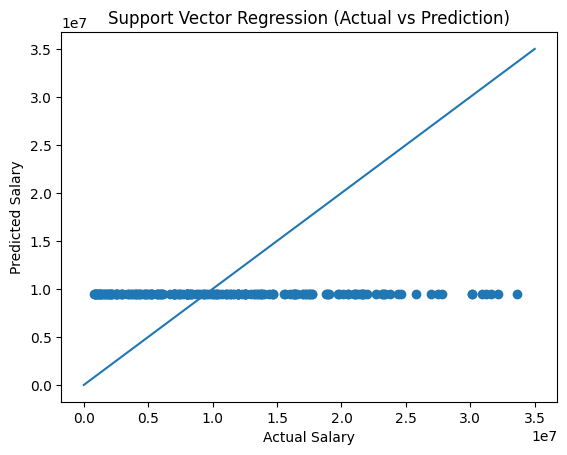

In [ ]:
#Plotting actual and predicted salary
plt.scatter(X_svr_new["actual_avg_salary"], X_svr_new["predicted_avg_salary"])

plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Support Vector Regression (Actual vs Prediction)")
plt.plot([0, 35000000], [0, 35000000])

In [ ]:
X_svr_new

,contract_start,contract_end,age,gp,w,l,avg_min,avg_pts,fgm,fga,fg_percentage,3pm,3pa,3p_percentage,ftm,fta,ft_percentage,avg_reb,avg_ast,avg_tov,avg_stl,avg_blk,avg_pf,plus_minus,predicted_avg_salary,actual_avg_salary,Salary Increase/Decrease,name
0,2019,2020,32,69,27,42,30.30,12.17,279,698,40.00,150,403,37.20,132,163,81.00,2.46,2.32,1.32,0.78,0.25,2.32,-90,9499996.05,2564753.00,6935243.05,Wesley Matthews
1,2015,2017,27,72,34,38,29.17,17.17,506,987,51.30,1,10,10.00,223,274,81.40,7.43,0.69,1.44,0.60,1.75,2.86,-104,9500000.59,21165675.00,-11665674.41,Brook Lopez
2,2011,2014,22,80,31,49,25.59,7.08,234,341,68.60,0,1,0.00,98,217,45.20,7.19,0.53,1.26,0.51,1.77,3.19,-100,9499991.38,10759763.50,-1259772.12,DeAndre Jordan
3,2015,2018,25,82,39,43,31.48,15.34,512,1100,46.50,57,179,31.80,177,232,76.30,6.17,2.34,2.07,1.23,0.48,2.99,105,9500002.52,8143323.50,1356679.02,Markieff Morris
4,2018,2019,32,81,35,46,30.41,16.63,506,911,55.50,1,7,14.30,334,582,57.40,12.49,1.30,2.57,0.59,1.62,3.07,89,9500002.40,13410739.00,-3910736.60,Dwight Howard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,2012,2014,24,5,2,3,27.20,19.20,38,77,49.40,0,0,0.00,20,32,62.50,3.60,1.20,1.20,0.20,0.80,1.60,-27,9499987.03,14693666.67,-5193679.64,Brook Lopez
195,2015,2018,24,74,21,53,34.18,19.30,631,1206,52.30,2,6,33.30,164,218,75.20,10.95,1.99,2.00,0.73,0.73,2.97,-302,9500002.22,12000000.00,-2499997.78,Nikola Vucevic
196,2015,2017,28,70,49,21,16.03,6.59,185,327,56.60,1,4,25.00,90,104,86.50,4.54,0.50,0.93,0.23,0.31,2.31,136,9499991.25,5766666.67,3733324.58,Aron Baynes
197,2013,2016,29,80,57,23,34.74,12.97,396,879,45.10,91,287,31.70,155,270,57.40,5.29,5.41,2.58,1.74,0.65,1.59,380,9500000.86,12000000.00,-2499999.14,Andre Iguodala


#### Overall

In [ ]:
#Putting all new columns into one df
data = {"name": nba_contracts["name"],
        "actual_salary": nba_contracts["avg_salary"],
        "knn_predicted_salary": X_knn["predicted_avg_salary"],
        "knn_avg_predicted_salary": X_knn_new["predicted_avg_salary"],
        "rf_predicted_salary": X_rf["predicted_avg_salary"],
        "rf_avg_predicted_salary": X_rf_new["predicted_avg_salary"],
        "svr_predicted_salary": X_svr["predicted_avg_salary"],
        "svr_avg_predicted_salary": X_svr_new["predicted_avg_salary"]}

pred_act = pd.DataFrame(data = data)
pred_act

,name,actual_salary,knn_predicted_salary,knn_avg_predicted_salary,rf_predicted_salary,rf_avg_predicted_salary,svr_predicted_salary,svr_avg_predicted_salary
0,Wesley Matthews,2564753.00,8090807.00,6896882.00,4887807.99,5868974.86,8701269.61,9499996.05
1,Brook Lopez,21165675.00,13996253.90,14732340.85,18989256.37,19052810.36,14075395.51,9500000.59
2,DeAndre Jordan,10759763.50,11825251.23,7821009.00,10458727.28,10506216.67,8682724.10,9499991.38
3,Markieff Morris,8143323.50,19012248.78,14685946.05,10522048.27,10117141.00,15173798.19,9500002.52
4,Dwight Howard,13410739.00,17377677.55,16165158.45,17534027.19,15561471.40,19397741.10,9500002.40
...,...,...,...,...,...,...,...,...
194,Brook Lopez,14693666.67,3772707.80,3772707.80,10256344.17,14378259.00,1497333.07,9499987.03
195,Nikola Vucevic,12000000.00,13625803.87,16254111.90,12608409.62,12472702.12,15270605.99,9500002.22
196,Aron Baynes,5766666.67,5356770.83,6648608.33,6244255.97,5989231.62,7036096.36,9499991.25
197,Andre Iguodala,12000000.00,11848741.14,16494405.79,13549950.71,12590247.23,14876434.57,9500000.86


In [ ]:
#Taking mean of all predictions
total_salary = (X_knn["Salary Increase/Decrease"] +
               X_knn_new["Salary Increase/Decrease"] +
               X_rf["Salary Increase/Decrease"] +
               X_rf_new["Salary Increase/Decrease"] +
               X_svr["Salary Increase/Decrease"] +
               X_svr_new["Salary Increase/Decrease"])

total_data = {"name": pred_act["name"],
              "Mean Salary Increase/Decrease": total_salary / 6,
              "Actual Salary": nba_contracts["avg_salary"]} #6 for how many models we used

total_inc_dec = pd.DataFrame(total_data)
total_inc_dec["Predicted Salary"] = total_inc_dec["Mean Salary Increase/Decrease"] + total_inc_dec["Actual Salary"]

In [ ]:
#Sort mean inc/dec
total_inc_dec.sort_values(by=["Mean Salary Increase/Decrease"], ascending = False)

,name,Mean Salary Increase/Decrease,Actual Salary,Predicted Salary
97,Willie Cauley-Stein,8162981.32,2177483.00,10340464.32
143,Wilson Chandler,5173558.24,7369732.50,12543290.74
3,Markieff Morris,5025207.30,8143323.50,13168530.80
0,Wesley Matthews,4759536.59,2564753.00,7324289.59
15,Jared Dudley,4358807.68,4250000.00,8608807.68
...,...,...,...,...
125,Harrison Barnes,-9065709.97,23370934.75,14305224.78
99,Kevin Durant,-9570327.08,33599500.00,24029172.92
17,Kyle Lowry,-10275134.14,31633333.33,21358199.19
48,Paul Millsap,-10357014.31,30116666.67,19759652.36


The goal of this method was to find players who are playing better or worse than their value. As we can see, we can find the most overrated or underrated players based off of predictions with KNN, DT, and SVR. Taking a look at the more overrated players, these players are up in age compared to the rest of the players in this data set. Even though age plays a big part on your longevity, it gave us another topic to discuss looking at our data.

### Age is just a number

In [ ]:
#Different Factors, same target which is avg_salary
X =  nba_contracts[['age', 'plus_minus', 'pts', 'ast']]
y =  nba_contracts['avg_salary']

In [ ]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#Same split just with X being scaled
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = .25, train_size = .75, random_state=0)

In [ ]:
#Train and fit a KNN model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
#Predict on the Training Set
y_pred = knn.predict(X_test)
y_pred

array([ 6082453.66666667, 21511201.48      ,  6017486.93333333,
       11953837.88      , 22060599.12      ,  9893566.4       ,
        8953126.36666667,  4574641.05      ,  5440184.45      ,
        6300000.        ,  4794519.85      ,  6293333.33333333,
       27870677.76666666, 15573781.66666667,  5951385.06666667,
        5560500.        ,  5674954.86666667, 17130263.05      ,
       10259008.25      , 13985076.9       , 14904527.86666667,
        4172859.5       , 10543781.66666667,  3496297.2       ,
       15554462.36      ,  7683739.5       ,  7684439.5       ,
        6993333.33333333, 11178664.7       ,  4172859.5       ,
        6110000.06666667, 12716105.        ,  8725255.2       ,
        4072297.2       ,  9263645.        , 12583664.7       ,
        6667397.9       , 18046893.01666667, 14219090.        ,
        9263645.        , 19417688.95      ,  6890000.        ,
       10243599.93333333,  5258000.8       ,  4433325.        ,
        5232462.5       ,  3705695.2    

In [ ]:
# Evaluate the model and print the MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 19235782663432.555


In [ ]:
#Calculate RMSE
rmse = (mse ** 0.5)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 4385861.678556741


####Grid Search

In [ ]:
#Parameters being used
parameters = {"n_neighbors" : [1,3,5,7,9,11,13,15,17,19], "p" :[1,2]}

#the following grid search is using euclidean as the distance metric
grid_search = GridSearchCV(KNeighborsRegressor(),parameters, cv= None, return_train_score = True)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'n_neighbors': 11, 'p': 1}

In [ ]:
#Get the best estimator and save it in variable
knn_best_reg_model = grid_search.best_estimator_
knn_best_reg_model

KNeighborsRegressor(n_neighbors=11, p=1)

In [ ]:
#Get the predicted salary
y_pred_2 = knn_best_reg_model.predict(X_test)
y_pred_2

array([ 6140414.73484849, 16659045.43030303,  5579805.83333333,
       15133160.75454546, 22743709.09545455,  9266657.35606061,
        5645936.8030303 ,  5189533.86363636,  4682632.0530303 ,
        7331137.50757576,  4019401.68181818,  8543440.6969697 ,
       25118506.77272727, 11452639.62878788,  7517040.53030303,
        7695381.59090909,  6023519.75757576, 15659472.59848485,
       11543071.41666667, 11973300.18939394, 14252417.67121212,
        4755064.45454545,  8657889.39393939,  4765548.60606061,
       16916316.20909091,  5980334.86363636,  7783674.77272727,
        8096804.33333333, 11445848.34545455,  4755064.45454545,
        5235835.66666667, 13197323.86363636,  8364266.63636364,
        5980334.86363636,  9104281.84848485, 15208809.68636364,
        6440607.40909091, 17423054.3030303 , 14238316.66666667,
        8744804.57575758, 16522474.96969697,  6504754.06060606,
        8940138.37878788,  4877408.18181818,  5457002.45454545,
        5250253.56818182,  4051191.15909

In [ ]:
# Get the mean square error
mse = mean_squared_error(y_test, y_pred_2)
print("Mean Squared Error:", mse)

Mean Squared Error: 18135570334860.605


In [ ]:
# Get the Root mean square Error
rmse = (mse ** 0.5)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 4258587.83340917


So in my first model we get a root mean square error of 4.3 million dollars. For my best model with all the best parameters we get a Root mean squared error of 4.1 million dollars. We see in the first model that the predicted average salary and the actual average salary are off by about 4.3 million. After then going in and refining and tuning the hyperparameters and finding the best we see that the RMSE goes down to 4.1 million. That is an improvement from the first model as it shaved off about .3 million dollars off of the RMSE. Of course the rmse still being high that could be due to the fact that only a select few factors were included during the train test split. The reason being was that I figured only certain columns made sense such as 'age', 'plus_minus', 'pts', 'ast' because those type of stats in basketball games make a big difference as they can indicate to teams or to others how good or how bad this player is. But with that we wanted to see of those players which ones are considered sharp shooters?

### Good Shooter or Not


In todays NBA, the game revolves all around the three point line and being able to shoot the three. Teams all around value players highly that can shoot the three as it maximizes the amount of points a team can earn, so usually teams will spend a good amount on players who posses that valuable trait in there game. So here I will be prediciting how many players from our dataset are considered good shooters in the league. I will first create a new column in the dataset called good shooter and set the 3p_percentage column to above 35.2% (reason I chose this is because according to NBA stats this is around league average) and then predicting who can shoot the lights out and who can't.

In [ ]:
#Create a new column on Nba_contracts dataset called good_shooter, with 0 being considered bad and
#1 - being considered a good shooter, 35.2 is the league average 3 point percentage
# which is what ill be using to determine whose a above or below average shooter
nba_contracts['good_shooter'] = (nba_contracts['3p_percentage'] >= 35.2).astype(int)
#The reason I chose those 7 factors is because when I put all the stats (excluding stuff for 3 pointers)
#I found out that these 7 factors were the highest when looking at feature importance so I included them in there
X = nba_contracts[['blk','contract_start','gp','w','l','min','pts']]
y = nba_contracts['good_shooter']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0, test_size = .25, train_size = .75)
len(X_train), len(X_test), len(y_test), len(y_train)

(149, 50, 50, 149)

In [ ]:
#Get the Shape for train and test for both x and y
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((149, 7), (50, 7), (149,), (50,))

In [ ]:
#Train and fit a logistic regression model
lgr_model = LogisticRegression()
lgr_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#Predict on the Training set
y_train_pred = lgr_model.predict(X_train)
y_train_pred

array([1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0])

In [ ]:
#Calculate the accuracy
acc_train = (y_train_pred == y_train).sum() / len(y_train)
acc_train

0.6711409395973155

In [ ]:
#See the recall score for the train
recall_score(y_train, y_train_pred, average = None)

array([0.675     , 0.66666667])

In [ ]:
#Predict on the Test set
y_test_pred = lgr_model.predict(X_test)
y_test_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0])

#### Grid Search

Next I will be doing a grid search to find the best parameters

In [ ]:
#Gather Parameters for Grid Search
parameters = {"C" : [0.001, 0.01, 0.1, 1, 3, 5, 7, 9, 10, 15],
              "solver" : ["lbfgs", "liblinear"
              ,"newton-cg","sag", "saga"],
              "max_iter": [100, 500, 1000, None],
              "penalty": ["l1", "l2"]
              }
#Create a new model for the grid search
grid_search_best = GridSearchCV(LogisticRegression(),parameters, cv= 5)
#Fit the model on the training set
grid_search_best.fit(X_train, y_train)
#Find the best parameters from the grid search
grid_search_best.best_params_

{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

In [ ]:
#Creating a variable called best model to put the best estimator
best_model = grid_search_best.best_estimator_
best_model

LogisticRegression(C=0.1)

In [ ]:
#Predict on the Training set
y_train_pred = best_model.predict(X_train)
y_train_pred

array([1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0])

In [ ]:
#Get the accuracy on the training set
acc_train = (y_train_pred == y_train).sum()/len(y_train)
acc_train

0.6711409395973155

In [ ]:
#Get the recall score on the training set
recall_score(y_train_pred, y_train, average = None)

array([0.7012987 , 0.63888889])

In [ ]:
#Predict on the Test set
y_test_pred = best_model.predict(X_test)
y_test_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0])

In [ ]:
#Get the accuracy on the test set
acc_test = (y_test_pred == y_test).sum()/len(y_test)
acc_test

0.6

In [ ]:
#Get the recall score on the Test set
recall_score(y_test_pred, y_test, average = None)

array([0.58823529, 0.625     ])

In [ ]:
#Produce a confusion matrix
conf_matrix = pd.crosstab(y_test_pred,
                          y_test,
                          margins = True,
                          )
conf_matrix

good_shooter,0,1,All
row_0,,,
0,20,14,34
1,6,10,16
All,26,24,50


In [ ]:
#Generate thresholds
test_probs = best_model.predict_proba(X_test)

test_probs

array([[0.57912402, 0.42087598],
       [0.99120553, 0.00879447],
       [0.69898494, 0.30101506],
       [0.31839362, 0.68160638],
       [0.4398453 , 0.5601547 ],
       [0.55540501, 0.44459499],
       [0.43707283, 0.56292717],
       [0.66917681, 0.33082319],
       [0.58722144, 0.41277856],
       [0.53213871, 0.46786129],
       [0.70033524, 0.29966476],
       [0.45670738, 0.54329262],
       [0.3989522 , 0.6010478 ],
       [0.76421784, 0.23578216],
       [0.45964573, 0.54035427],
       [0.62970652, 0.37029348],
       [0.95428732, 0.04571268],
       [0.99715009, 0.00284991],
       [0.71965567, 0.28034433],
       [0.48196898, 0.51803102],
       [0.76036962, 0.23963038],
       [0.66670859, 0.33329141],
       [0.67131824, 0.32868176],
       [0.64106521, 0.35893479],
       [0.23894567, 0.76105433],
       [0.44143668, 0.55856332],
       [0.58389006, 0.41610994],
       [0.66332755, 0.33667245],
       [0.56599672, 0.43400328],
       [0.66670859, 0.33329141],
       [0.

In [ ]:
#Calculate the FPR, TPR and the thresholds for the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test,test_probs[:,1])
print("The thresholds used on the test data were: \n", thresholds)

print("The FPRs for the different thresholds are: \n", fpr)

print("The TPRs for the different thresholds are: \n", tpr)

The thresholds used on the test data were: 
 [1.76105433 0.76105433 0.68160638 0.6366907  0.58248818 0.56292717
 0.55856332 0.54035427 0.46786129 0.44459499 0.41610994 0.41277856
 0.40061725 0.38489401 0.37029348 0.35905436 0.35893479 0.33667245
 0.33329141 0.33082319 0.30961608 0.10840363 0.10681886 0.00284991]
The FPRs for the different thresholds are: 
 [0.         0.         0.         0.03846154 0.03846154 0.15384615
 0.15384615 0.23076923 0.23076923 0.30769231 0.30769231 0.34615385
 0.34615385 0.38461538 0.38461538 0.42307692 0.42307692 0.5
 0.5        0.53846154 0.53846154 0.84615385 0.84615385 1.        ]
The TPRs for the different thresholds are: 
 [0.         0.04166667 0.08333333 0.08333333 0.16666667 0.16666667
 0.29166667 0.29166667 0.5        0.5        0.625      0.625
 0.70833333 0.70833333 0.75       0.75       0.79166667 0.79166667
 0.875      0.875      0.95833333 0.95833333 1.         1.        ]


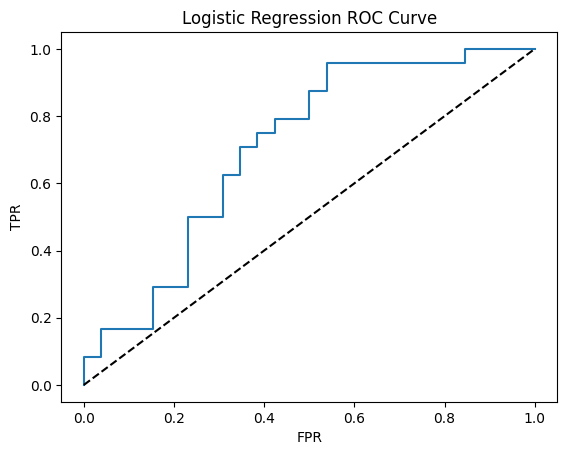

In [ ]:
plt.plot(fpr, tpr)  #Plot the FPRs against the TPRs for the different thresholds
plt.plot([0,1], [0,1], 'k--') #plottign the diagonal line

plt.title("Logistic Regression ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR");

<Axes: ylabel='Feature'>

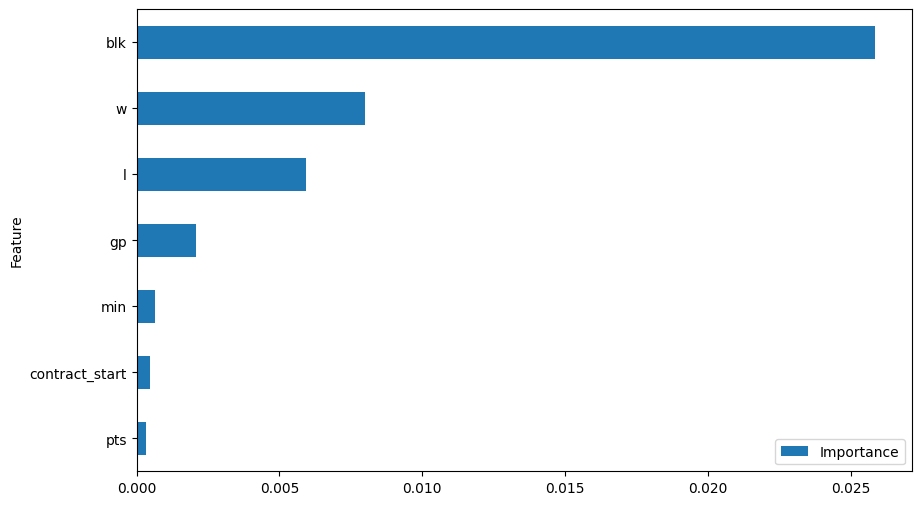

In [ ]:
best_model.coef_
coefficients = best_model.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

So my first Logistic Regression model achieved a training accuracy of 69.3% and a test accuracy of 60%. This indicates that model is performing moderately ok in classifying whether or not an NBA player is a good shooter or not. Now for the test accuracy being a bit lower when it comes to predicting on unseen data. This indicates that there is some type of overfitting. During the analysis we see here that the feature importance indicates that blocks play a very key factor on whether or not players are considered good shooters. Whilst blocks is a random stat to be considered a key factor on being a good shooter it is understandable. Usually with shot blockers they tend to have a longer wingspan which means why they shoot the ball they have a higher arc on there release. Players like Kevin Durant, Victor Wembanyama and Chet Holmgren are considered very good shot blockers due to there wingspan and because of that wingspan they have a higher release arc which makes it harder for other teams to contest there shots. For my last logistic Regression model I fine tuned some hyperparameters in order to get the best parameters and my best parameters were C= 0.01, penalty = l1, max_iter = 100, and solver = liblinear. When running through the test I got a training accuracy of 69.3% (So the same as the first model), but then I got a test accuracy of 56% (which was a tiny bit worst than the first one). Once again this could be due to the model overfitting and not doing well on unseen data or other factors. However our feature importance stayed the same, meaning blocks still plays a significant role into determing if players are a good three point shooter or not. With the players being considered sharp shooters we would consider they put up a lot of points during the season but sometimes that isn't the case, next we predict the number of points a player should be scoring based on there stats



### Points Player should have

For predicting points I'll be using a Linear Regression model to predict the number of points a player is likely to score in a season based on various factors such as minutes played, games played, aged, assists,  and other relevant variables based on the stats they the season before signing there new contract. The goal is to analyze past performance data to identify trends and patterns that contribute to a player's scoring ability. This analysis can provide insights into the impact of different variables on scoring performance and help optimize strategies for maximizing scoring opportunities.


In [ ]:
#Change the factors in the predictor columns, target variable change
X = nba_contracts[['age','min','ast','reb','stl', 'blk', 'gp', 'avg_salary']]
y = nba_contracts['pts']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0, test_size = .25, train_size = .75)

In [ ]:
# Train a Linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Predict on the Training set
y_train_pred = lr_model.predict(X_train)
y_train_pred

array([1711.82838806,  318.06247279, 1179.74976453, 1219.66315005,
       1071.41280734,  747.33791888,   14.65832639,  593.22268141,
        309.82092289,  747.17417619, 1595.45580749,  421.01295869,
        330.83228263,  457.25458995, 1632.18433416,  779.16119291,
        939.98698249,  -38.56533368, 1425.41382991, 1323.32877785,
       1242.32520093,  557.60560333,  483.1043278 ,   76.57303272,
       1066.16123105,  507.63183581, 1495.14550312,  540.59414319,
        333.54665991, 1511.50342589,  864.43209641, 1056.50357015,
        268.59581127,  889.69474801,  566.99666013,  887.12765664,
       1416.86844137,  783.80342474,  108.30494156, 1570.5851701 ,
       1515.18347672, 1123.67582892, 1431.98605902, 1239.0370163 ,
       1080.45881899,  652.01469088, 1273.24706299, 1325.03357377,
       1287.19888447,  843.63747958, 1058.39023121, 1304.3517165 ,
        736.86809718,  955.09007936, 1349.65527858,  521.1798916 ,
        476.60861425,  935.79515648,  614.89706689,  974.60069

In [ ]:
#Predict on the test set
y_test_pred_lr = lr_model.predict(X_test)
y_test_pred_lr

array([ 554.21155729, 1072.23099782,   75.76885879, 1521.70892895,
       1281.64500158,  737.52125286,  700.1888012 ,  365.34526554,
        405.96842412,  649.07252221,  -57.5374673 ,  510.55779324,
       1457.89652465,  920.74889972,  857.75792582,  402.27620398,
        652.06791698, 1000.9665731 ,  903.76611763, 1297.80111373,
       1136.01446255,    2.97589353,  412.99704088,   82.34347055,
       1407.17050231,  549.93683262,  519.68728175,  395.30766442,
        805.06486272,    2.97589353,  476.5067467 , 1549.88142637,
        959.20879955,  -44.86343326,  786.08841639, 1191.33609324,
        290.47152552,  966.38516697, 1135.53530736,  743.68241187,
        799.60401101,  206.30014833,  860.13217051,  -22.73765626,
        655.12492944,  415.17962809,  224.47841332,  528.55683827,
         67.39054733,  197.88386839])

In [ ]:
#Calculate the Mean Square Error
mse = mean_squared_error(y_test, y_test_pred)
mse

637992.42

In [ ]:
#Calculate the Root mean square Error
rmse = (mse ** 0.5)
rmse

798.7442769748026

In [ ]:
#Created a new column called points predicted to predict the number of points a player has currently vs.
#the amount points he should have from the season before signing there new contract
nba_contracts['points_predicted'] = None  # Initialize a new column with None values
# Match predictions to correct rows in nba_contracts based on the test indices
test_indices = y_test.index
nba_contracts.loc[test_indices, 'points_predicted'] = y_test_pred_lr
nba_contracts = nba_contracts.dropna(subset=['points_predicted'])
nba_contracts['points_predicted'] = nba_contracts['points_predicted'].astype("int64")
nba_contracts[['name','pts','points_predicted']]

,name,pts,points_predicted
4,Dwight Howard,1347,966
5,Austin Rivers,530,700
7,JaMychal Green,611,402
8,Kyle O'Quinn,294,224
12,Solomon Hill,246,405
...,...,...,...
178,Justin Holiday,629,519
183,Danilo Gallinari,628,737
184,Aron Baynes,482,395
188,Marc Gasol,951,1191


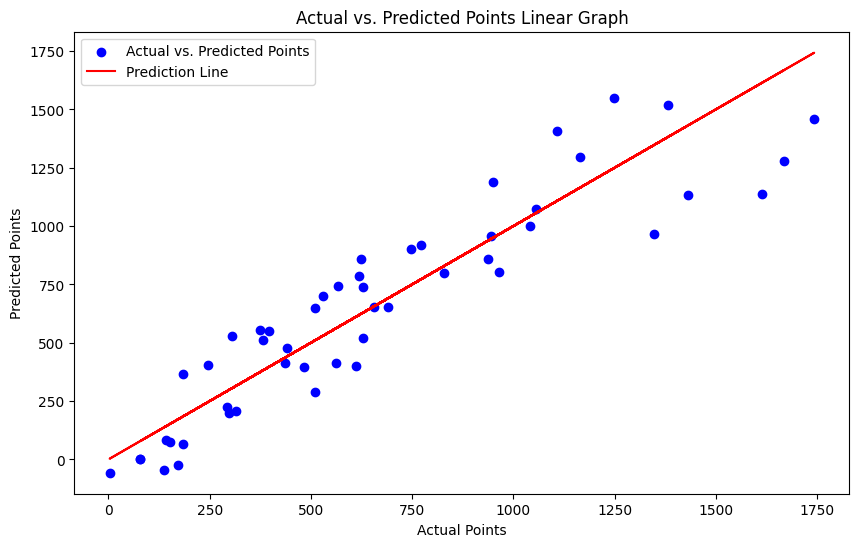

In [ ]:
# Create a figure and axis
plt.figure(figsize=(10, 6))
plt.scatter(nba_contracts['pts'], nba_contracts['points_predicted'],
            color='blue', label='Actual vs. Predicted Points')
plt.plot(nba_contracts['pts'], nba_contracts['pts'], color='red',
         label='Prediction Line')
# Add labels and title
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.title('Actual vs. Predicted Points Linear Graph')
plt.legend();

In [ ]:
#Getting a correlation between actual and predicted points
nba_contracts['pts'].corr(nba_contracts['points_predicted'])

0.914702962521818

When Examining our scatter plot of predicted points of players vs. actual points of players. When calculating the correlation we see that we get a correlation of 0.93 indicating that the graph has a strong positive correlation. This indicates that the model is effective when going ahead and predicting player total points from the season prior. However of course there are some limitations when it comes to this graph, some of the one factors included is the fact that only a select number of columns were selected when splitting the test and training set. Only 'age','min','ast','reb','stl', 'blk', 'gp', 'avg_salary' were included in the predictor columns and the other ones were left out.

---

##Section 7. Conclusion

At the beginning, we asked how well can we predict salary based on a season's stats. With our accuracy and RMSE, it should tell us that it is not as accurate as we would have liked it. We then took a different course of questions and started asking why are these predictions so low or high? We also asked whether we can identify if a player is a good shooter or not depending on other variables.

As we kept pursuing our question, we came to the realization that we were not getting the results we ideally wanted. Instead of asking how can we get better accuracies, we took a different route and started asking why are we not getting the results we wanted. This led us to find new ways to look at datasets and eventually ask questions that the common viewer, NBA analyst, or an NBA GM asks on a daily basis. With our dataset, we were not able to answer our inital question but with a different datset, or more data, we believe we can accurately predict salary of an NBA player.

##Section 8 Appendix

#####SVR

In [ ]:
#Setting SVR with kernel = "linear"
svr_rbf = SVR(kernel = "linear")
svr_rbf.fit(X_train, y_train)

In [ ]:
#Predict using SVR
y_pred_svr = svr_rbf.predict(X_test)
y_pred_svr

In [ ]:
#MSE of SVR
mse = np.mean((y_pred_svr - y_test)**2)
mse

In [ ]:
#RMSE of SVR
rmse = np.sqrt(mse)
rmse

###### Best SVR Parameters

In [ ]:
#Setting an empty SVR
svr_rbf = SVR()

In [ ]:
#Parameters being passed in to GridSearch
param_grid = {
    "kernel" : ["linear", "poly", "rbf"],
    "C" : [0.1, 1, 10, 100],
    "gamma" : ["auto", 0.1, 1, 10]
    }

In [ ]:
#GridSearchCv to find best parameters
grid_search = GridSearchCV(estimator = svr_rbf, param_grid = param_grid, cv = 5, return_train_score = True)
grid_search.fit(X_train, y_train)

In [ ]:
#Best Parameters for SVR
grid_search.best_params_

In [ ]:
#Setting best parameters to SVR
rnd_clf_best = SVR(C = 10, gamma = "auto", kernel = "linear")
rnd_clf_best.fit(X_train, y_train)


In [ ]:
#MSE of best SVR
y_test_preds = rnd_clf_best.predict(X_test)
mse = np.mean((y_test_preds - y_test)**2)
mse

In [ ]:
#RMSe of best SVR
rmse = np.sqrt(mse)
rmse

After predicting avg_salary on 4 different models, we can find which models did the best and wort when calculating RMSE. The best model for our dataset was Random Forests and the worst was Regression Trees. This was interesting because since random forests are a bunch of regression trees, the idea would be that regression trees and RF would have a close RMSE.

The total value for the "best" RMSE is still a relatively high number. Since it is easier to calculate categories, we should turn these continuous variables into categories to show accuracy.